In [ ]:
!pip install isbnlib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import isbnlib
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans, vq
from pylab import plot, show
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors
from sklearn.cluster import KMeans
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from progressbar import ProgressBar
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")
print('Libraries imported!')

Libraries imported!


In [ ]:
df = pd.read_csv(r'/content/drive/MyDrive/ML project/book_info.csv', error_bad_lines = False)
df = df.drop(columns=['Unnamed: 0'])
df


id                                          Book_Name  \
0      96523                                  ‡¶Æ‡ßÅ‡¶®‡¶§‡¶æ‡¶ñ‡¶æ‡¶¨ ‡¶π‡¶æ‡¶¶‡ßÄ‡¶∏      
1      39118                  ‡¶Æ‡ßá‡¶ò‡¶æ‡¶ö‡ßç‡¶õ‡¶®‡ßç‡¶® ‡¶à‡¶Æ‡¶æ‡¶® (‡¶™‡ßá‡¶™‡¶æ‡¶∞‡¶¨‡ßç‡¶Ø‡¶æ‡¶ï)        
2     141682   ‡¶∏‡¶æ‡¶Æ‡¶∑‡ßç‡¶ü‡¶ø‡¶ï ‡¶Ö‡¶∞‡ßç‡¶•‡¶®‡ßÄ‡¶§‡¶ø (‡¶™‡¶æ‡¶∞‡ßç‡¶∏ ‡¶ï‡ßã‡¶∞‡ßç‡¶∏ ‡¶¶‡ßç‡¶¨‡¶ø‡¶§‡ßÄ‡ßü ‡¶¨‡¶∞‡ßç‡¶∑‡ßá‡¶∞...   
3     136770   ‡¶õ‡¶æ‡¶§‡ßç‡¶∞‡¶≤‡ßÄ‡¶ó‡ßá‡¶∞ ‡¶á‡¶§‡¶ø‡¶π‡¶æ‡¶∏ ‡¶¨‡¶æ‡¶Ç‡¶≤‡¶æ‡¶¶‡ßá‡¶∂‡ßá‡¶∞ ‡¶á‡¶§‡¶ø‡¶π‡¶æ‡¶∏ (‡ßß‡ßØ‡ß™‡ßÆ-‡ßß‡ßØ‡ß≠...   
4      82740   ‡¶è‡¶∏‡¶è‡¶∏‡¶∏‡¶ø ‡¶¨‡¶ø‡¶ú‡ßç‡¶û‡¶æ‡¶® ‡¶Æ‡ßá‡¶á‡¶° ‡¶á‡¶ú‡¶ø ‡¶™‡ßç‡¶∞‡¶∂‡ßç‡¶®‡¶™‡¶§‡ßç‡¶∞, ‡¶∏‡¶ï‡¶≤ ‡¶∂‡¶ø‡¶ï‡ßç‡¶∑...   
...      ...                                                ...   
6306   21943   ‡¶§‡¶ø‡¶Æ‡¶ø‡¶∞ ‡¶™‡ßç‡¶∞‡ßá‡¶Æ, ‡¶∏‡¶™‡ßç‡¶§ ‡¶Ü‡¶§‡¶ô‡ßç‡¶ï, ‡¶≤‡¶∞‡ßç‡¶®‡¶æ ‡¶°‡ßÅ‡¶® (‡¶™‡ßá‡¶™‡¶æ‡¶∞‡¶¨‡ßç‡¶Ø‡¶æ...   
6307   51194       Guinness World Records 2020 (Hardcover)        
6308   35327                               ‡¶ñ‡ßÅ‡¶® (‡¶π‡¶æ‡¶∞‡ßç‡¶°‡¶ï‡¶≠‡¶æ‡¶∞)        
6309    8262      ‡¶è‡¶ï‡¶æ‡¶§‡ßç‡¶§‡¶∞ ‡¶è‡¶¨‡¶Ç ‡¶Æ‡ßÅ‡¶ï‡ßç‡¶§‡¶ø‡¶Ø‡ßã‡¶¶‡ßç‡¶ß‡¶æ ‡¶™‡¶∞‡¶ø‡¶¨‡¶æ‡¶∞ (‡¶π‡¶æ‡¶∞‡ßç‡¶°‡¶ï‡¶≠‡¶æ‡¶∞)     
6310   58654                     ‡¶∞‡¶π‡¶∏‡ßç‡¶Ø‡ßá‡¶∞ ‡¶¶‡ßç‡¶¨‡ßÄ‡¶™ (‡¶π‡¶æ‡¶∞‡ßç‡¶°‡¶ï‡¶≠‡¶æ‡¶∞)        

                              Writer_Name  \
0            ‡¶Æ‡¶æ‡¶ì‡¶≤‡¶æ‡¶®‡¶æ ‡¶Æ‡ßã‡¶É ‡¶∏‡¶æ‡¶ñ‡¶æ‡¶ì‡ßü‡¶æ‡¶§ ‡¶â‡¶≤‡ßç‡¶≤‡¶æ‡¶π    
1             ‡¶∂‡¶æ‡¶á‡¶ñ ‡¶Ü‡¶¨‡ßç‡¶¶‡ßÅ‡¶≤ ‡¶Æ‡¶æ‡¶≤‡¶ø‡¶ï ‡¶Ü‡¶≤ ‡¶ï‡¶æ‡¶∏‡¶ø‡¶Æ    
2                  ‡¶∏‡ßÅ‡¶ï‡ßá‡¶∂ ‡¶ö‡¶®‡ßç‡¶¶‡ßç‡¶∞ ‡¶ú‡ßã‡ßü‡¶æ‡¶∞‡¶¶‡¶æ‡¶∞    
3                     ‡¶∏‡¶æ‡¶á‡¶´‡ßÅ‡¶∞ ‡¶∞‡¶π‡¶Æ‡¶æ‡¶® ‡¶∏‡ßã‡¶π‡¶æ‡¶ó    
4      ‡¶™‡¶æ‡¶û‡ßç‡¶ú‡ßá‡¶∞‡ßÄ ‡¶∏‡¶Æ‡ßç‡¶™‡¶æ‡¶¶‡¶®‡¶æ ‡¶™‡¶∞‡ßç‡¶∑‡¶¶ (‡¶∏‡¶Æ‡ßç‡¶™‡¶æ‡¶¶‡¶ï)    
...                                   ...   
6306                  ‡¶Ü‡¶∞. ‡¶°‡¶ø. ‡¶¨‡ßç‡¶≤‡ßç‡¶Ø‡¶æ‡¶ï‡¶Æ‡ßã‡¶∞    
6307     Guinness World Records (Editor)    
6308                         ‡¶Ü‡¶π‡¶Æ‡ßá‡¶¶ ‡¶´‡¶æ‡¶∞‡ßÅ‡¶ï    
6309                         ‡¶Ü‡¶ì‡¶≤‡¶ø‡ßü‡¶æ ‡¶ñ‡¶æ‡¶®‡¶Æ    
6310                           ‡¶ú‡ßÅ‡¶≤ ‡¶≠‡¶æ‡¶∞‡ßç‡¶®    

                                               Category  Rating  \
0                                      ‡¶π‡¶æ‡¶¶‡¶ø‡¶∏ ‡¶ì ‡¶∏‡ßÅ‡¶®‡ßç‡¶®‡¶æ‡¶§        1   
1                               ‡¶à‡¶Æ‡¶æ‡¶®, ‡¶Ü‡¶ï‡ßç‡¶¨‡¶ø‡¶¶‡¶æ ‡¶ì ‡¶§‡¶æ‡¶ì‡¶¨‡¶æ‡¶π        1   
2                                               ‡¶°‡¶ø‡¶ó‡ßç‡¶∞‡¶ø        1   
3                          ‡¶™‡ßç‡¶∞‡¶∏‡¶ô‡ßç‡¶ó: ‡¶¨‡¶æ‡¶Ç‡¶≤‡¶æ‡¶¶‡ßá‡¶∂‡ßá‡¶∞ ‡¶∞‡¶æ‡¶ú‡¶®‡ßÄ‡¶§‡¶ø        1   
4      ‡¶®‡¶¨‡¶Æ ‡¶ì ‡¶¶‡¶∂‡¶Æ (‡¶è‡¶∏‡¶è‡¶∏‡¶∏‡¶ø): ‡¶¨‡¶ø‡¶ú‡ßç‡¶û‡¶æ‡¶® ‡¶¨‡¶ø‡¶≠‡¶æ‡¶ó ‡¶™‡¶æ‡¶†‡ßç‡¶Ø ‡¶∏‡¶π‡¶æ‡¶Ø‡¶º...       1   
...                                                 ...     ...   
6306   ‡¶∞‡¶π‡¶∏‡ßç‡¶Ø, ‡¶ó‡ßã‡ßü‡ßá‡¶®‡ßç‡¶¶‡¶æ, ‡¶≠‡ßå‡¶§‡¶ø‡¶ï, ‡¶Æ‡¶ø‡¶•, ‡¶•‡ßç‡¶∞‡¶ø‡¶≤‡¶æ‡¶∞, ‡¶ì ‡¶Ö‡ßç‡¶Ø‡¶æ‡¶°...       5   
6307   Foreign Language Books: Essay, Articles & Res...       5   
6308                                   ‡¶∏‡¶Æ‡¶ï‡¶æ‡¶≤‡ßÄ‡¶® ‡¶â‡¶™‡¶®‡ßç‡¶Ø‡¶æ‡¶∏        5   
6309           ‡¶Æ‡ßÅ‡¶ï‡ßç‡¶§‡¶ø‡¶Ø‡ßÅ‡¶¶‡ßç‡¶ß‡ßá‡¶∞ ‡¶°‡¶æ‡ßü‡ßá‡¶∞‡¶ø, ‡¶ö‡¶ø‡¶†‡¶ø ‡¶ì ‡¶∏‡ßç‡¶Æ‡ßÉ‡¶§‡¶ø‡¶ö‡¶æ‡¶∞‡¶£        5   
6310                                ‡¶∂‡¶ø‡¶∂‡ßÅ-‡¶ï‡¶ø‡¶∂‡ßã‡¶∞ ‡¶â‡¶™‡¶®‡ßç‡¶Ø‡¶æ‡¶∏        5   

                                                 Review      Site sentiment  \
0     (‡ßß) ‡¶¨‡¶á ‡¶ü‡¶ø ‡¶∂‡¶§ ‡¶∂‡¶§  ‡¶ú‡¶æ‡¶≤ ‡¶π‡¶æ‡¶¶‡¶ø‡¶∏‡ßá ‡¶≠‡¶∞‡¶™‡ßÅ‡¶∞ ‡•§ (‡ß®) ‡¶¶‡ßç‡¶¨‡ßÄ‡¶® ...  Rokomari  negative   
1     ‡¶¨‡¶á ‡¶∞‡¶ø‡¶≠‡¶ø‡¶â : ‡¶Æ‡ßá‡¶ò‡¶æ‡¶ö‡ßç‡¶õ‡¶®‡ßç‡¶® ‡¶à‡¶Æ‡¶æ‡¶®  ‡¶™‡¶æ‡¶† ‡¶Ö‡¶®‡ßÅ‡¶≠‡ßÇ‡¶§‡¶ø: "‡¶è‡¶ï‡¶ü‡¶ø...  Rokomari  negative   
2                                             ‡¶™‡¶°‡¶º‡¶§‡ßá ‡¶ö‡¶æ‡¶á  Rokomari  negative   
3                                               ‡¶†‡¶ø‡¶ï ‡¶Ü‡¶õ‡ßá  Rokomari  negative   
4     ‡¶è‡¶ü‡¶ø ‡¶è‡¶∏‡¶è‡¶∏‡¶∏‡¶ø ‡¶∂‡¶ø‡¶ï‡ßç‡¶∑‡¶æ‡¶∞‡ßç‡¶•‡ßÄ‡¶∞ 2020 ‡¶è‡¶∞ ‡¶ú‡¶®‡ßç‡¶Ø ‡¶è‡

In [ ]:
# print("# of NaN in each columns:", df.isnull().sum(), sep='\n')

In [ ]:
book_count = df.groupby('Writer_Name')['Book_Name'].count().reset_index().sort_values('Book_Name', ascending=False).head(20).set_index('Writer_Name')
book_count

Book_Name
Writer_Name                                                  
 ‡¶π‡ßÅ‡¶Æ‡¶æ‡ßü‡ßÇ‡¶® ‡¶Ü‡¶π‡¶Æ‡ßá‡¶¶                                             79
 ‡¶Æ‡ßÅ‡¶π‡¶Æ‡ßç‡¶Æ‡¶¶ ‡¶ú‡¶æ‡¶´‡¶∞ ‡¶á‡¶ï‡¶¨‡¶æ‡¶≤                                        69
 ‡¶∞‡¶ï‡¶ø‡¶¨ ‡¶π‡¶æ‡¶∏‡¶æ‡¶®                                                43
 ‡¶∏‡ßÅ‡¶®‡ßÄ‡¶≤ ‡¶ó‡¶ô‡ßç‡¶ó‡ßã‡¶™‡¶æ‡¶ß‡ßç‡¶Ø‡¶æ‡¶Ø‡¶º (‡¶®‡ßÄ‡¶≤‡¶≤‡ßã‡¶π‡¶ø‡¶§)                            36
 ‡¶ï‡¶æ‡¶ú‡ßÄ ‡¶Ü‡¶®‡ßã‡ßü‡¶æ‡¶∞ ‡¶π‡ßã‡¶∏‡ßá‡¶®                                         31
 ‡¶Ü‡¶®‡¶ø‡¶∏‡ßÅ‡¶≤ ‡¶π‡¶ï                                                 23
 ‡¶∏‡¶Æ‡¶∞‡ßá‡¶∂ ‡¶Æ‡¶ú‡ßÅ‡¶Æ‡¶¶‡¶æ‡¶∞                                             22
 ÿ≠ŸÉŸäŸÖ ÿßŸÑÿßŸÖÿ™ ŸÖŸàŸÑÿßŸÜÿß ÿßÿ¥ÿ±ŸÅ ÿπŸÑŸä ÿ™ŸáÿßŸÜŸàŸä ÿ±ÿ≠ ( ‡¶π‡¶æ‡¶ï‡ßÄ‡¶Æ‡ßÅ‡¶≤...         21
 ‡¶Æ‡ßã‡¶∂‡¶§‡¶æ‡¶ï ‡¶Ü‡¶π‡¶Æ‡ßá‡¶¶                                              21
 ‡¶Ü‡¶π‡¶∏‡¶æ‡¶® ‡¶π‡¶æ‡¶¨‡ßÄ‡¶¨ (‡¶ï‡¶æ‡¶∞‡ßç‡¶ü‡ßÅ‡¶®‡¶ø‡¶∏‡ßç‡¶ü)                                 18
 ‡¶Ü‡¶ó‡¶æ‡¶•‡¶æ ‡¶ï‡ßç‡¶∞‡¶ø‡¶∏‡ßç‡¶ü‡¶ø                                            17
 ‡¶™‡¶æ‡¶û‡ßç‡¶ú‡ßá‡¶∞‡ßÄ ‡¶∏‡¶Æ‡ßç‡¶™‡¶æ‡¶¶‡¶®‡¶æ ‡¶™‡¶∞‡ßç‡¶∑‡¶¶ (‡¶∏‡¶Æ‡ßç‡¶™‡¶æ‡¶¶‡¶ï)                         17
 S. M. Zakir Hussain                                       16
 (ÿ¥ŸäÿÆ ÿßŸÑÿßÿ≥ŸÑÿßŸÖ ŸÖŸÅÿ™Ÿä ŸÖÿ≠ŸÖÿØ ÿ™ŸÇŸä ÿπÿ´ŸÖÿßŸÜŸä) ‡¶∂‡¶æ‡¶á‡¶ñ‡ßÅ‡¶≤ ‡¶á‡¶∏‡¶≤‡¶æ...         15
 ‡¶¨‡ßÅ‡¶¶‡ßç‡¶ß‡¶¶‡ßá‡¶¨ ‡¶ó‡ßÅ‡¶π                                              14
 ‡¶∏‡ßÅ‡¶Æ‡¶®‡ßç‡¶§ ‡¶Ü‡¶∏‡¶≤‡¶æ‡¶Æ                                              14
 ‡¶∂‡ßÄ‡¶∞‡ßç‡¶∑‡ßá‡¶®‡ßç‡¶¶‡ßÅ ‡¶Æ‡ßÅ‡¶ñ‡ßã‡¶™‡¶æ‡¶ß‡ßç‡¶Ø‡¶æ‡ßü                                    14
 ‡¶á‡¶Æ‡¶¶‡¶æ‡¶¶‡ßÅ‡¶≤ ‡¶π‡¶ï ‡¶Æ‡¶ø‡¶≤‡¶®                                           14
 ‡¶∂‡¶∞‡ßé‡¶ö‡¶®‡ßç‡¶¶‡ßç‡¶∞ ‡¶ö‡¶ü‡ßç‡¶ü‡ßã‡¶™‡¶æ‡¶ß‡ßç‡¶Ø‡¶æ‡¶Ø‡¶º                                   14
 ‡¶¨‡ßç‡¶∞‡¶æ‡ßü‡¶æ‡¶® ‡¶ü‡ßç‡¶∞‡ßá‡¶∏‡¶ø                                            14

In [ ]:
df1 = pd.read_csv(r'/content/drive/MyDrive/ML project/user_info.csv', error_bad_lines = False)
df1 = df1.drop(columns=['Unnamed: 0'])
df1
calculateCount = df1[['book_id']].copy()
calculateCount

data = np.zeros((1, calculateCount.shape[0]))
x = 0;
for index, row in df1.iterrows():
  for x in row:
    if(x >=1 and x<= 5):
      data[0][index]+=1
df['ratings_count'] = data[0]

df

id                                          Book_Name  \
0      96523                                  ‡¶Æ‡ßÅ‡¶®‡¶§‡¶æ‡¶ñ‡¶æ‡¶¨ ‡¶π‡¶æ‡¶¶‡ßÄ‡¶∏      
1      39118                  ‡¶Æ‡ßá‡¶ò‡¶æ‡¶ö‡ßç‡¶õ‡¶®‡ßç‡¶® ‡¶à‡¶Æ‡¶æ‡¶® (‡¶™‡ßá‡¶™‡¶æ‡¶∞‡¶¨‡ßç‡¶Ø‡¶æ‡¶ï)        
2     141682   ‡¶∏‡¶æ‡¶Æ‡¶∑‡ßç‡¶ü‡¶ø‡¶ï ‡¶Ö‡¶∞‡ßç‡¶•‡¶®‡ßÄ‡¶§‡¶ø (‡¶™‡¶æ‡¶∞‡ßç‡¶∏ ‡¶ï‡ßã‡¶∞‡ßç‡¶∏ ‡¶¶‡ßç‡¶¨‡¶ø‡¶§‡ßÄ‡ßü ‡¶¨‡¶∞‡ßç‡¶∑‡ßá‡¶∞...   
3     136770   ‡¶õ‡¶æ‡¶§‡ßç‡¶∞‡¶≤‡ßÄ‡¶ó‡ßá‡¶∞ ‡¶á‡¶§‡¶ø‡¶π‡¶æ‡¶∏ ‡¶¨‡¶æ‡¶Ç‡¶≤‡¶æ‡¶¶‡ßá‡¶∂‡ßá‡¶∞ ‡¶á‡¶§‡¶ø‡¶π‡¶æ‡¶∏ (‡ßß‡ßØ‡ß™‡ßÆ-‡ßß‡ßØ‡ß≠...   
4      82740   ‡¶è‡¶∏‡¶è‡¶∏‡¶∏‡¶ø ‡¶¨‡¶ø‡¶ú‡ßç‡¶û‡¶æ‡¶® ‡¶Æ‡ßá‡¶á‡¶° ‡¶á‡¶ú‡¶ø ‡¶™‡ßç‡¶∞‡¶∂‡ßç‡¶®‡¶™‡¶§‡ßç‡¶∞, ‡¶∏‡¶ï‡¶≤ ‡¶∂‡¶ø‡¶ï‡ßç‡¶∑...   
...      ...                                                ...   
6306   21943   ‡¶§‡¶ø‡¶Æ‡¶ø‡¶∞ ‡¶™‡ßç‡¶∞‡ßá‡¶Æ, ‡¶∏‡¶™‡ßç‡¶§ ‡¶Ü‡¶§‡¶ô‡ßç‡¶ï, ‡¶≤‡¶∞‡ßç‡¶®‡¶æ ‡¶°‡ßÅ‡¶® (‡¶™‡ßá‡¶™‡¶æ‡¶∞‡¶¨‡ßç‡¶Ø‡¶æ...   
6307   51194       Guinness World Records 2020 (Hardcover)        
6308   35327                               ‡¶ñ‡ßÅ‡¶® (‡¶π‡¶æ‡¶∞‡ßç‡¶°‡¶ï‡¶≠‡¶æ‡¶∞)        
6309    8262      ‡¶è‡¶ï‡¶æ‡¶§‡ßç‡¶§‡¶∞ ‡¶è‡¶¨‡¶Ç ‡¶Æ‡ßÅ‡¶ï‡ßç‡¶§‡¶ø‡¶Ø‡ßã‡¶¶‡ßç‡¶ß‡¶æ ‡¶™‡¶∞‡¶ø‡¶¨‡¶æ‡¶∞ (‡¶π‡¶æ‡¶∞‡ßç‡¶°‡¶ï‡¶≠‡¶æ‡¶∞)     
6310   58654                     ‡¶∞‡¶π‡¶∏‡ßç‡¶Ø‡ßá‡¶∞ ‡¶¶‡ßç‡¶¨‡ßÄ‡¶™ (‡¶π‡¶æ‡¶∞‡ßç‡¶°‡¶ï‡¶≠‡¶æ‡¶∞)        

                              Writer_Name  \
0            ‡¶Æ‡¶æ‡¶ì‡¶≤‡¶æ‡¶®‡¶æ ‡¶Æ‡ßã‡¶É ‡¶∏‡¶æ‡¶ñ‡¶æ‡¶ì‡ßü‡¶æ‡¶§ ‡¶â‡¶≤‡ßç‡¶≤‡¶æ‡¶π    
1             ‡¶∂‡¶æ‡¶á‡¶ñ ‡¶Ü‡¶¨‡ßç‡¶¶‡ßÅ‡¶≤ ‡¶Æ‡¶æ‡¶≤‡¶ø‡¶ï ‡¶Ü‡¶≤ ‡¶ï‡¶æ‡¶∏‡¶ø‡¶Æ    
2                  ‡¶∏‡ßÅ‡¶ï‡ßá‡¶∂ ‡¶ö‡¶®‡ßç‡¶¶‡ßç‡¶∞ ‡¶ú‡ßã‡ßü‡¶æ‡¶∞‡¶¶‡¶æ‡¶∞    
3                     ‡¶∏‡¶æ‡¶á‡¶´‡ßÅ‡¶∞ ‡¶∞‡¶π‡¶Æ‡¶æ‡¶® ‡¶∏‡ßã‡¶π‡¶æ‡¶ó    
4      ‡¶™‡¶æ‡¶û‡ßç‡¶ú‡ßá‡¶∞‡ßÄ ‡¶∏‡¶Æ‡ßç‡¶™‡¶æ‡¶¶‡¶®‡¶æ ‡¶™‡¶∞‡ßç‡¶∑‡¶¶ (‡¶∏‡¶Æ‡ßç‡¶™‡¶æ‡¶¶‡¶ï)    
...                                   ...   
6306                  ‡¶Ü‡¶∞. ‡¶°‡¶ø. ‡¶¨‡ßç‡¶≤‡ßç‡¶Ø‡¶æ‡¶ï‡¶Æ‡ßã‡¶∞    
6307     Guinness World Records (Editor)    
6308                         ‡¶Ü‡¶π‡¶Æ‡ßá‡¶¶ ‡¶´‡¶æ‡¶∞‡ßÅ‡¶ï    
6309                         ‡¶Ü‡¶ì‡¶≤‡¶ø‡ßü‡¶æ ‡¶ñ‡¶æ‡¶®‡¶Æ    
6310                           ‡¶ú‡ßÅ‡¶≤ ‡¶≠‡¶æ‡¶∞‡ßç‡¶®    

                                               Category  Rating  \
0                                      ‡¶π‡¶æ‡¶¶‡¶ø‡¶∏ ‡¶ì ‡¶∏‡ßÅ‡¶®‡ßç‡¶®‡¶æ‡¶§        1   
1                               ‡¶à‡¶Æ‡¶æ‡¶®, ‡¶Ü‡¶ï‡ßç‡¶¨‡¶ø‡¶¶‡¶æ ‡¶ì ‡¶§‡¶æ‡¶ì‡¶¨‡¶æ‡¶π        1   
2                                               ‡¶°‡¶ø‡¶ó‡ßç‡¶∞‡¶ø        1   
3                          ‡¶™‡ßç‡¶∞‡¶∏‡¶ô‡ßç‡¶ó: ‡¶¨‡¶æ‡¶Ç‡¶≤‡¶æ‡¶¶‡ßá‡¶∂‡ßá‡¶∞ ‡¶∞‡¶æ‡¶ú‡¶®‡ßÄ‡¶§‡¶ø        1   
4      ‡¶®‡¶¨‡¶Æ ‡¶ì ‡¶¶‡¶∂‡¶Æ (‡¶è‡¶∏‡¶è‡¶∏‡¶∏‡¶ø): ‡¶¨‡¶ø‡¶ú‡ßç‡¶û‡¶æ‡¶® ‡¶¨‡¶ø‡¶≠‡¶æ‡¶ó ‡¶™‡¶æ‡¶†‡ßç‡¶Ø ‡¶∏‡¶π‡¶æ‡¶Ø‡¶º...       1   
...                                                 ...     ...   
6306   ‡¶∞‡¶π‡¶∏‡ßç‡¶Ø, ‡¶ó‡ßã‡ßü‡ßá‡¶®‡ßç‡¶¶‡¶æ, ‡¶≠‡ßå‡¶§‡¶ø‡¶ï, ‡¶Æ‡¶ø‡¶•, ‡¶•‡ßç‡¶∞‡¶ø‡¶≤‡¶æ‡¶∞, ‡¶ì ‡¶Ö‡ßç‡¶Ø‡¶æ‡¶°...       5   
6307   Foreign Language Books: Essay, Articles & Res...       5   
6308                                   ‡¶∏‡¶Æ‡¶ï‡¶æ‡¶≤‡ßÄ‡¶® ‡¶â‡¶™‡¶®‡ßç‡¶Ø‡¶æ‡¶∏        5   
6309           ‡¶Æ‡ßÅ‡¶ï‡ßç‡¶§‡¶ø‡¶Ø‡ßÅ‡¶¶‡ßç‡¶ß‡ßá‡¶∞ ‡¶°‡¶æ‡ßü‡ßá‡¶∞‡¶ø, ‡¶ö‡¶ø‡¶†‡¶ø ‡¶ì ‡¶∏‡ßç‡¶Æ‡ßÉ‡¶§‡¶ø‡¶ö‡¶æ‡¶∞‡¶£        5   
6310                                ‡¶∂‡¶ø‡¶∂‡ßÅ-‡¶ï‡¶ø‡¶∂‡ßã‡¶∞ ‡¶â‡¶™‡¶®‡ßç‡¶Ø‡¶æ‡¶∏        5   

                                                 Review      Site sentiment  \
0     (‡ßß) ‡¶¨‡¶á ‡¶ü‡¶ø ‡¶∂‡¶§ ‡¶∂‡¶§  ‡¶ú‡¶æ‡¶≤ ‡¶π‡¶æ‡¶¶‡¶ø‡¶∏‡ßá ‡¶≠‡¶∞‡¶™‡ßÅ‡¶∞ ‡•§ (‡ß®) ‡¶¶‡ßç‡¶¨‡ßÄ‡¶® ...  Rokomari  negative   
1     ‡¶¨‡¶á ‡¶∞‡¶ø‡¶≠‡¶ø‡¶â : ‡¶Æ‡ßá‡¶ò‡¶æ‡¶ö‡ßç‡¶õ‡¶®‡ßç‡¶® ‡¶à‡¶Æ‡¶æ‡¶®  ‡¶™‡¶æ‡¶† ‡¶Ö‡¶®‡ßÅ‡¶≠‡ßÇ‡¶§‡¶ø: "‡¶è‡¶ï‡¶ü‡¶ø...  Rokomari  negative   
2                                             ‡¶™‡¶°‡¶º‡¶§‡ßá ‡¶ö‡¶æ‡¶á  Rokomari  negative   
3                                               ‡¶†‡¶ø‡¶ï ‡¶Ü‡¶õ‡ßá  Rokomari  negative   
4     ‡¶è‡¶ü‡¶ø ‡¶è‡¶∏‡¶è‡¶∏‡¶∏‡¶ø ‡¶∂‡¶ø‡¶ï‡ßç‡¶∑‡¶æ‡¶∞‡ßç‡¶•‡ßÄ‡¶∞ 2020 ‡¶è‡¶∞ ‡¶ú‡¶®‡ßç‡¶Ø ‡¶è‡

In [ ]:
print("# of NaN in each columns:", df.isnull().sum(), sep='\n')

# of NaN in each columns:
id                           0
Book_Name                    0
Writer_Name                 17
Category                     3
Rating                       0
Review                       0
Site                         0
sentiment                    0
label                        0
Book_name_without_spaces     0
ratings_count                0
dtype: int64


In [ ]:
df = df.dropna()
df = df.reset_index()

df

index      id                                          Book_Name  \
0         0   96523                                  ‡¶Æ‡ßÅ‡¶®‡¶§‡¶æ‡¶ñ‡¶æ‡¶¨ ‡¶π‡¶æ‡¶¶‡ßÄ‡¶∏      
1         1   39118                  ‡¶Æ‡ßá‡¶ò‡¶æ‡¶ö‡ßç‡¶õ‡¶®‡ßç‡¶® ‡¶à‡¶Æ‡¶æ‡¶® (‡¶™‡ßá‡¶™‡¶æ‡¶∞‡¶¨‡ßç‡¶Ø‡¶æ‡¶ï)        
2         2  141682   ‡¶∏‡¶æ‡¶Æ‡¶∑‡ßç‡¶ü‡¶ø‡¶ï ‡¶Ö‡¶∞‡ßç‡¶•‡¶®‡ßÄ‡¶§‡¶ø (‡¶™‡¶æ‡¶∞‡ßç‡¶∏ ‡¶ï‡ßã‡¶∞‡ßç‡¶∏ ‡¶¶‡ßç‡¶¨‡¶ø‡¶§‡ßÄ‡ßü ‡¶¨‡¶∞‡ßç‡¶∑‡ßá‡¶∞...   
3         3  136770   ‡¶õ‡¶æ‡¶§‡ßç‡¶∞‡¶≤‡ßÄ‡¶ó‡ßá‡¶∞ ‡¶á‡¶§‡¶ø‡¶π‡¶æ‡¶∏ ‡¶¨‡¶æ‡¶Ç‡¶≤‡¶æ‡¶¶‡ßá‡¶∂‡ßá‡¶∞ ‡¶á‡¶§‡¶ø‡¶π‡¶æ‡¶∏ (‡ßß‡ßØ‡ß™‡ßÆ-‡ßß‡ßØ‡ß≠...   
4         4   82740   ‡¶è‡¶∏‡¶è‡¶∏‡¶∏‡¶ø ‡¶¨‡¶ø‡¶ú‡ßç‡¶û‡¶æ‡¶® ‡¶Æ‡ßá‡¶á‡¶° ‡¶á‡¶ú‡¶ø ‡¶™‡ßç‡¶∞‡¶∂‡ßç‡¶®‡¶™‡¶§‡ßç‡¶∞, ‡¶∏‡¶ï‡¶≤ ‡¶∂‡¶ø‡¶ï‡ßç‡¶∑...   
...     ...     ...                                                ...   
6287   6306   21943   ‡¶§‡¶ø‡¶Æ‡¶ø‡¶∞ ‡¶™‡ßç‡¶∞‡ßá‡¶Æ, ‡¶∏‡¶™‡ßç‡¶§ ‡¶Ü‡¶§‡¶ô‡ßç‡¶ï, ‡¶≤‡¶∞‡ßç‡¶®‡¶æ ‡¶°‡ßÅ‡¶® (‡¶™‡ßá‡¶™‡¶æ‡¶∞‡¶¨‡ßç‡¶Ø‡¶æ...   
6288   6307   51194       Guinness World Records 2020 (Hardcover)        
6289   6308   35327                               ‡¶ñ‡ßÅ‡¶® (‡¶π‡¶æ‡¶∞‡ßç‡¶°‡¶ï‡¶≠‡¶æ‡¶∞)        
6290   6309    8262      ‡¶è‡¶ï‡¶æ‡¶§‡ßç‡¶§‡¶∞ ‡¶è‡¶¨‡¶Ç ‡¶Æ‡ßÅ‡¶ï‡ßç‡¶§‡¶ø‡¶Ø‡ßã‡¶¶‡ßç‡¶ß‡¶æ ‡¶™‡¶∞‡¶ø‡¶¨‡¶æ‡¶∞ (‡¶π‡¶æ‡¶∞‡ßç‡¶°‡¶ï‡¶≠‡¶æ‡¶∞)     
6291   6310   58654                     ‡¶∞‡¶π‡¶∏‡ßç‡¶Ø‡ßá‡¶∞ ‡¶¶‡ßç‡¶¨‡ßÄ‡¶™ (‡¶π‡¶æ‡¶∞‡ßç‡¶°‡¶ï‡¶≠‡¶æ‡¶∞)        

                              Writer_Name  \
0            ‡¶Æ‡¶æ‡¶ì‡¶≤‡¶æ‡¶®‡¶æ ‡¶Æ‡ßã‡¶É ‡¶∏‡¶æ‡¶ñ‡¶æ‡¶ì‡ßü‡¶æ‡¶§ ‡¶â‡¶≤‡ßç‡¶≤‡¶æ‡¶π    
1             ‡¶∂‡¶æ‡¶á‡¶ñ ‡¶Ü‡¶¨‡ßç‡¶¶‡ßÅ‡¶≤ ‡¶Æ‡¶æ‡¶≤‡¶ø‡¶ï ‡¶Ü‡¶≤ ‡¶ï‡¶æ‡¶∏‡¶ø‡¶Æ    
2                  ‡¶∏‡ßÅ‡¶ï‡ßá‡¶∂ ‡¶ö‡¶®‡ßç‡¶¶‡ßç‡¶∞ ‡¶ú‡ßã‡ßü‡¶æ‡¶∞‡¶¶‡¶æ‡¶∞    
3                     ‡¶∏‡¶æ‡¶á‡¶´‡ßÅ‡¶∞ ‡¶∞‡¶π‡¶Æ‡¶æ‡¶® ‡¶∏‡ßã‡¶π‡¶æ‡¶ó    
4      ‡¶™‡¶æ‡¶û‡ßç‡¶ú‡ßá‡¶∞‡ßÄ ‡¶∏‡¶Æ‡ßç‡¶™‡¶æ‡¶¶‡¶®‡¶æ ‡¶™‡¶∞‡ßç‡¶∑‡¶¶ (‡¶∏‡¶Æ‡ßç‡¶™‡¶æ‡¶¶‡¶ï)    
...                                   ...   
6287                  ‡¶Ü‡¶∞. ‡¶°‡¶ø. ‡¶¨‡ßç‡¶≤‡ßç‡¶Ø‡¶æ‡¶ï‡¶Æ‡ßã‡¶∞    
6288     Guinness World Records (Editor)    
6289                         ‡¶Ü‡¶π‡¶Æ‡ßá‡¶¶ ‡¶´‡¶æ‡¶∞‡ßÅ‡¶ï    
6290                         ‡¶Ü‡¶ì‡¶≤‡¶ø‡ßü‡¶æ ‡¶ñ‡¶æ‡¶®‡¶Æ    
6291                           ‡¶ú‡ßÅ‡¶≤ ‡¶≠‡¶æ‡¶∞‡ßç‡¶®    

                                               Category  Rating  \
0                                      ‡¶π‡¶æ‡¶¶‡¶ø‡¶∏ ‡¶ì ‡¶∏‡ßÅ‡¶®‡ßç‡¶®‡¶æ‡¶§        1   
1                               ‡¶à‡¶Æ‡¶æ‡¶®, ‡¶Ü‡¶ï‡ßç‡¶¨‡¶ø‡¶¶‡¶æ ‡¶ì ‡¶§‡¶æ‡¶ì‡¶¨‡¶æ‡¶π        1   
2                                               ‡¶°‡¶ø‡¶ó‡ßç‡¶∞‡¶ø        1   
3                          ‡¶™‡ßç‡¶∞‡¶∏‡¶ô‡ßç‡¶ó: ‡¶¨‡¶æ‡¶Ç‡¶≤‡¶æ‡¶¶‡ßá‡¶∂‡ßá‡¶∞ ‡¶∞‡¶æ‡¶ú‡¶®‡ßÄ‡¶§‡¶ø        1   
4      ‡¶®‡¶¨‡¶Æ ‡¶ì ‡¶¶‡¶∂‡¶Æ (‡¶è‡¶∏‡¶è‡¶∏‡¶∏‡¶ø): ‡¶¨‡¶ø‡¶ú‡ßç‡¶û‡¶æ‡¶® ‡¶¨‡¶ø‡¶≠‡¶æ‡¶ó ‡¶™‡¶æ‡¶†‡ßç‡¶Ø ‡¶∏‡¶π‡¶æ‡¶Ø‡¶º...       1   
...                                                 ...     ...   
6287   ‡¶∞‡¶π‡¶∏‡ßç‡¶Ø, ‡¶ó‡ßã‡ßü‡ßá‡¶®‡ßç‡¶¶‡¶æ, ‡¶≠‡ßå‡¶§‡¶ø‡¶ï, ‡¶Æ‡¶ø‡¶•, ‡¶•‡ßç‡¶∞‡¶ø‡¶≤‡¶æ‡¶∞, ‡¶ì ‡¶Ö‡ßç‡¶Ø‡¶æ‡¶°...       5   
6288   Foreign Language Books: Essay, Articles & Res...       5   
6289                                   ‡¶∏‡¶Æ‡¶ï‡¶æ‡¶≤‡ßÄ‡¶® ‡¶â‡¶™‡¶®‡ßç‡¶Ø‡¶æ‡¶∏        5   
6290           ‡¶Æ‡ßÅ‡¶ï‡ßç‡¶§‡¶ø‡¶Ø‡ßÅ‡¶¶‡ßç‡¶ß‡ßá‡¶∞ ‡¶°‡¶æ‡ßü‡ßá‡¶∞‡¶ø, ‡¶ö‡¶ø‡¶†‡¶ø ‡¶ì ‡¶∏‡ßç‡¶Æ‡ßÉ‡¶§‡¶ø‡¶ö‡¶æ‡¶∞‡¶£        5   
6291                                ‡¶∂‡¶ø‡¶∂‡ßÅ-‡¶ï‡¶ø‡¶∂‡ßã‡¶∞ ‡¶â‡¶™‡¶®‡ßç‡¶Ø‡¶æ‡¶∏        5   

                                                 Review      Site sentiment  \
0     (‡ßß) ‡¶¨‡¶á ‡¶ü‡¶ø ‡¶∂‡¶§ ‡¶∂‡¶§  ‡¶ú‡¶æ‡¶≤ ‡¶π‡¶æ‡¶¶‡¶ø‡¶∏‡ßá ‡¶≠‡¶∞‡¶™‡ßÅ‡¶∞ ‡•§ (‡ß®) ‡¶¶‡ßç‡¶¨‡ßÄ‡¶® ...  Rokomari  negative   
1     ‡¶¨‡¶á ‡¶∞‡¶ø‡¶≠‡¶ø‡¶â : ‡¶Æ‡ßá‡¶ò‡¶æ‡¶ö‡ßç‡¶õ‡¶®‡ßç‡¶® ‡¶à‡¶Æ‡¶æ‡¶®  ‡¶™‡¶æ‡¶† ‡¶Ö‡¶®‡ßÅ‡¶≠‡ßÇ‡¶§‡¶ø: "‡¶è‡¶ï‡¶ü‡¶ø...  Rokomari  negative   
2                                             ‡¶™‡¶°‡¶º‡¶§‡ßá ‡¶ö‡¶æ‡¶á  Rokomari  negative   
3                                               ‡¶†‡¶ø‡¶ï ‡¶Ü‡¶õ‡ßá  Rokomari  negative   
4     ‡¶è‡

In [ ]:
df = df.drop(columns=['index'])

df

id                                          Book_Name  \
0      96523                                  ‡¶Æ‡ßÅ‡¶®‡¶§‡¶æ‡¶ñ‡¶æ‡¶¨ ‡¶π‡¶æ‡¶¶‡ßÄ‡¶∏      
1      39118                  ‡¶Æ‡ßá‡¶ò‡¶æ‡¶ö‡ßç‡¶õ‡¶®‡ßç‡¶® ‡¶à‡¶Æ‡¶æ‡¶® (‡¶™‡ßá‡¶™‡¶æ‡¶∞‡¶¨‡ßç‡¶Ø‡¶æ‡¶ï)        
2     141682   ‡¶∏‡¶æ‡¶Æ‡¶∑‡ßç‡¶ü‡¶ø‡¶ï ‡¶Ö‡¶∞‡ßç‡¶•‡¶®‡ßÄ‡¶§‡¶ø (‡¶™‡¶æ‡¶∞‡ßç‡¶∏ ‡¶ï‡ßã‡¶∞‡ßç‡¶∏ ‡¶¶‡ßç‡¶¨‡¶ø‡¶§‡ßÄ‡ßü ‡¶¨‡¶∞‡ßç‡¶∑‡ßá‡¶∞...   
3     136770   ‡¶õ‡¶æ‡¶§‡ßç‡¶∞‡¶≤‡ßÄ‡¶ó‡ßá‡¶∞ ‡¶á‡¶§‡¶ø‡¶π‡¶æ‡¶∏ ‡¶¨‡¶æ‡¶Ç‡¶≤‡¶æ‡¶¶‡ßá‡¶∂‡ßá‡¶∞ ‡¶á‡¶§‡¶ø‡¶π‡¶æ‡¶∏ (‡ßß‡ßØ‡ß™‡ßÆ-‡ßß‡ßØ‡ß≠...   
4      82740   ‡¶è‡¶∏‡¶è‡¶∏‡¶∏‡¶ø ‡¶¨‡¶ø‡¶ú‡ßç‡¶û‡¶æ‡¶® ‡¶Æ‡ßá‡¶á‡¶° ‡¶á‡¶ú‡¶ø ‡¶™‡ßç‡¶∞‡¶∂‡ßç‡¶®‡¶™‡¶§‡ßç‡¶∞, ‡¶∏‡¶ï‡¶≤ ‡¶∂‡¶ø‡¶ï‡ßç‡¶∑...   
...      ...                                                ...   
6287   21943   ‡¶§‡¶ø‡¶Æ‡¶ø‡¶∞ ‡¶™‡ßç‡¶∞‡ßá‡¶Æ, ‡¶∏‡¶™‡ßç‡¶§ ‡¶Ü‡¶§‡¶ô‡ßç‡¶ï, ‡¶≤‡¶∞‡ßç‡¶®‡¶æ ‡¶°‡ßÅ‡¶® (‡¶™‡ßá‡¶™‡¶æ‡¶∞‡¶¨‡ßç‡¶Ø‡¶æ...   
6288   51194       Guinness World Records 2020 (Hardcover)        
6289   35327                               ‡¶ñ‡ßÅ‡¶® (‡¶π‡¶æ‡¶∞‡ßç‡¶°‡¶ï‡¶≠‡¶æ‡¶∞)        
6290    8262      ‡¶è‡¶ï‡¶æ‡¶§‡ßç‡¶§‡¶∞ ‡¶è‡¶¨‡¶Ç ‡¶Æ‡ßÅ‡¶ï‡ßç‡¶§‡¶ø‡¶Ø‡ßã‡¶¶‡ßç‡¶ß‡¶æ ‡¶™‡¶∞‡¶ø‡¶¨‡¶æ‡¶∞ (‡¶π‡¶æ‡¶∞‡ßç‡¶°‡¶ï‡¶≠‡¶æ‡¶∞)     
6291   58654                     ‡¶∞‡¶π‡¶∏‡ßç‡¶Ø‡ßá‡¶∞ ‡¶¶‡ßç‡¶¨‡ßÄ‡¶™ (‡¶π‡¶æ‡¶∞‡ßç‡¶°‡¶ï‡¶≠‡¶æ‡¶∞)        

                              Writer_Name  \
0            ‡¶Æ‡¶æ‡¶ì‡¶≤‡¶æ‡¶®‡¶æ ‡¶Æ‡ßã‡¶É ‡¶∏‡¶æ‡¶ñ‡¶æ‡¶ì‡ßü‡¶æ‡¶§ ‡¶â‡¶≤‡ßç‡¶≤‡¶æ‡¶π    
1             ‡¶∂‡¶æ‡¶á‡¶ñ ‡¶Ü‡¶¨‡ßç‡¶¶‡ßÅ‡¶≤ ‡¶Æ‡¶æ‡¶≤‡¶ø‡¶ï ‡¶Ü‡¶≤ ‡¶ï‡¶æ‡¶∏‡¶ø‡¶Æ    
2                  ‡¶∏‡ßÅ‡¶ï‡ßá‡¶∂ ‡¶ö‡¶®‡ßç‡¶¶‡ßç‡¶∞ ‡¶ú‡ßã‡ßü‡¶æ‡¶∞‡¶¶‡¶æ‡¶∞    
3                     ‡¶∏‡¶æ‡¶á‡¶´‡ßÅ‡¶∞ ‡¶∞‡¶π‡¶Æ‡¶æ‡¶® ‡¶∏‡ßã‡¶π‡¶æ‡¶ó    
4      ‡¶™‡¶æ‡¶û‡ßç‡¶ú‡ßá‡¶∞‡ßÄ ‡¶∏‡¶Æ‡ßç‡¶™‡¶æ‡¶¶‡¶®‡¶æ ‡¶™‡¶∞‡ßç‡¶∑‡¶¶ (‡¶∏‡¶Æ‡ßç‡¶™‡¶æ‡¶¶‡¶ï)    
...                                   ...   
6287                  ‡¶Ü‡¶∞. ‡¶°‡¶ø. ‡¶¨‡ßç‡¶≤‡ßç‡¶Ø‡¶æ‡¶ï‡¶Æ‡ßã‡¶∞    
6288     Guinness World Records (Editor)    
6289                         ‡¶Ü‡¶π‡¶Æ‡ßá‡¶¶ ‡¶´‡¶æ‡¶∞‡ßÅ‡¶ï    
6290                         ‡¶Ü‡¶ì‡¶≤‡¶ø‡ßü‡¶æ ‡¶ñ‡¶æ‡¶®‡¶Æ    
6291                           ‡¶ú‡ßÅ‡¶≤ ‡¶≠‡¶æ‡¶∞‡ßç‡¶®    

                                               Category  Rating  \
0                                      ‡¶π‡¶æ‡¶¶‡¶ø‡¶∏ ‡¶ì ‡¶∏‡ßÅ‡¶®‡ßç‡¶®‡¶æ‡¶§        1   
1                               ‡¶à‡¶Æ‡¶æ‡¶®, ‡¶Ü‡¶ï‡ßç‡¶¨‡¶ø‡¶¶‡¶æ ‡¶ì ‡¶§‡¶æ‡¶ì‡¶¨‡¶æ‡¶π        1   
2                                               ‡¶°‡¶ø‡¶ó‡ßç‡¶∞‡¶ø        1   
3                          ‡¶™‡ßç‡¶∞‡¶∏‡¶ô‡ßç‡¶ó: ‡¶¨‡¶æ‡¶Ç‡¶≤‡¶æ‡¶¶‡ßá‡¶∂‡ßá‡¶∞ ‡¶∞‡¶æ‡¶ú‡¶®‡ßÄ‡¶§‡¶ø        1   
4      ‡¶®‡¶¨‡¶Æ ‡¶ì ‡¶¶‡¶∂‡¶Æ (‡¶è‡¶∏‡¶è‡¶∏‡¶∏‡¶ø): ‡¶¨‡¶ø‡¶ú‡ßç‡¶û‡¶æ‡¶® ‡¶¨‡¶ø‡¶≠‡¶æ‡¶ó ‡¶™‡¶æ‡¶†‡ßç‡¶Ø ‡¶∏‡¶π‡¶æ‡¶Ø‡¶º...       1   
...                                                 ...     ...   
6287   ‡¶∞‡¶π‡¶∏‡ßç‡¶Ø, ‡¶ó‡ßã‡ßü‡ßá‡¶®‡ßç‡¶¶‡¶æ, ‡¶≠‡ßå‡¶§‡¶ø‡¶ï, ‡¶Æ‡¶ø‡¶•, ‡¶•‡ßç‡¶∞‡¶ø‡¶≤‡¶æ‡¶∞, ‡¶ì ‡¶Ö‡ßç‡¶Ø‡¶æ‡¶°...       5   
6288   Foreign Language Books: Essay, Articles & Res...       5   
6289                                   ‡¶∏‡¶Æ‡¶ï‡¶æ‡¶≤‡ßÄ‡¶® ‡¶â‡¶™‡¶®‡ßç‡¶Ø‡¶æ‡¶∏        5   
6290           ‡¶Æ‡ßÅ‡¶ï‡ßç‡¶§‡¶ø‡¶Ø‡ßÅ‡¶¶‡ßç‡¶ß‡ßá‡¶∞ ‡¶°‡¶æ‡ßü‡ßá‡¶∞‡¶ø, ‡¶ö‡¶ø‡¶†‡¶ø ‡¶ì ‡¶∏‡ßç‡¶Æ‡ßÉ‡¶§‡¶ø‡¶ö‡¶æ‡¶∞‡¶£        5   
6291                                ‡¶∂‡¶ø‡¶∂‡ßÅ-‡¶ï‡¶ø‡¶∂‡ßã‡¶∞ ‡¶â‡¶™‡¶®‡ßç‡¶Ø‡¶æ‡¶∏        5   

                                                 Review      Site sentiment  \
0     (‡ßß) ‡¶¨‡¶á ‡¶ü‡¶ø ‡¶∂‡¶§ ‡¶∂‡¶§  ‡¶ú‡¶æ‡¶≤ ‡¶π‡¶æ‡¶¶‡¶ø‡¶∏‡ßá ‡¶≠‡¶∞‡¶™‡ßÅ‡¶∞ ‡•§ (‡ß®) ‡¶¶‡ßç‡¶¨‡ßÄ‡¶® ...  Rokomari  negative   
1     ‡¶¨‡¶á ‡¶∞‡¶ø‡¶≠‡¶ø‡¶â : ‡¶Æ‡ßá‡¶ò‡¶æ‡¶ö‡ßç‡¶õ‡¶®‡ßç‡¶® ‡¶à‡¶Æ‡¶æ‡¶®  ‡¶™‡¶æ‡¶† ‡¶Ö‡¶®‡ßÅ‡¶≠‡ßÇ‡¶§‡¶ø: "‡¶è‡¶ï‡¶ü‡¶ø...  Rokomari  negative   
2                                             ‡¶™‡¶°‡¶º‡¶§‡ßá ‡¶ö‡¶æ‡¶á  Rokomari  negative   
3                                               ‡¶†‡¶ø‡¶ï ‡¶Ü‡¶õ‡ßá  Rokomari  negative   
4     ‡¶è‡¶ü‡¶ø ‡¶è‡¶∏‡¶è‡¶∏‡¶∏‡¶ø ‡¶∂‡¶ø‡¶ï‡ßç‡¶∑‡¶æ‡¶∞‡ßç‡¶•‡ßÄ‡¶∞ 2020 ‡¶è‡¶∞ ‡¶ú‡¶®‡ßç‡¶Ø ‡¶è‡

In [ ]:
print("# of NaN in each columns:", df.isnull().sum(), sep='\n')

# of NaN in each columns:
id                          0
Book_Name                   0
Writer_Name                 0
Category                    0
Rating                      0
Review                      0
Site                        0
sentiment                   0
label                       0
Book_name_without_spaces    0
ratings_count               0
dtype: int64


In [ ]:
#Top 20 Highest Rated Books
most_rated_books = df.sort_values('ratings_count', ascending = False).head(20).set_index('Book_Name')
# plt.figure(figsize=(15,10))
# ax = sns.barplot(most_rated_books['ratings_count'], most_rated_books.index, palette='inferno')
# ax.set_title("Top 20 Highest Rated Books")
# ax.set_xlabel("Total Rates")
# for i in ax.patches:
#     ax.text(i.get_width()+.3, i.get_y()+0.3, str(round(i.get_width())), fontsize = 10, color = 'k')

most_rated_books

id  \
Book_Name                                                    
‡¶ú‡ßÄ‡¶¨‡¶®‡ßá ‡¶∞‡ßã‡¶¶‡ßç‡¶¶‡ßÅ‡¶∞‡ßá                                      152597   
 ‡¶Ø‡¶æ‡¶¶‡ßá‡¶∞ ‡¶¨‡¶ø‡ßü‡ßá ‡¶π‡¶¨‡ßá (‡¶π‡¶æ‡¶∞‡ßç‡¶°‡¶ï‡¶≠‡¶æ‡¶∞)                          66521   
 ‡¶°‡¶æ‡ßü‡¶æ‡¶¨‡ßá‡¶ü‡¶ø‡¶∏ : ‡¶∞‡ßã‡¶ó ‡¶≤‡¶ï‡ßç‡¶∑‡¶£ ‡¶ì ‡¶™‡ßç‡¶∞‡¶§‡¶ø‡¶ï‡¶æ‡¶∞                     3060   
 ‡¶Ö‡¶ô‡ßç‡¶ó‡¶æ‡¶∞ (‡¶π‡¶æ‡¶∞‡ßç‡¶°‡¶ï‡¶≠‡¶æ‡¶∞)                                 140357   
 ‡¶¨‡¶ô‡ßç‡¶ó‡¶¨‡¶®‡ßç‡¶ß‡ßÅ‡¶∞ ‡¶∞‡¶∏‡¶¨‡ßã‡¶ß (‡¶π‡¶æ‡¶∞‡ßç‡¶°‡¶ï‡¶≠‡¶æ‡¶∞)                       114256   
 ‡¶∏‡ßá‡¶®‡ßã‡¶®‡¶ø‡ßü‡¶Æ‡¶∏ ‡¶è‡¶®‡ßç‡¶° ‡¶è‡¶®‡ßç‡¶ü‡ßã‡¶®‡¶ø‡ßü‡¶Æ‡¶∏ ‡¶â‡¶á‡¶• ‡¶™‡ßç‡¶∞‡¶ø‡¶™‡¶ø‡¶ï‡ßç‡¶∏ ‡¶ì ‡¶∏‡¶æ‡¶´‡¶ø...  120901   
 ‡¶¨‡ßÅ‡¶≤‡¶¨‡ßÅ‡¶≤ ‡¶∏‡¶∞‡¶ì‡ßü‡¶æ‡¶∞ ‡¶≠‡ßç‡¶∞‡¶Æ‡¶£ ‡ß≠‡¶ü‡¶ø ‡¶¨‡¶á ‡¶∞‡¶ï‡¶Æ‡¶æ‡¶∞‡¶ø ‡¶ï‡¶æ‡¶≤‡ßá‡¶ï‡¶∂‡¶® (‡¶π‡¶æ‡¶∞...   92068   
 ‡¶Æ‡ßá‡¶°‡¶ø‡¶ï‡ßá‡¶≤ ‡¶°‡ßá‡¶®‡ßç‡¶ü‡¶æ‡¶≤ ‡¶∏‡¶æ‡¶ú‡ßá‡¶∂‡¶®  MEDICAL SERIES              41348   
 Prasiddha Alphabet (Hardcover)  Baby's Beginne...   84079   
 ‡¶Æ‡¶æ‡¶∏‡ßÅ‡¶¶ ‡¶∞‡¶æ‡¶®‡¶æ : ‡¶Æ‡ßá‡¶ú‡¶∞ ‡¶∞‡¶æ‡¶π‡¶æ‡¶§ - ‡ßß‡¶Æ ‡¶ì ‡ß®‡ßü ‡¶ñ‡¶®‡ßç‡¶° (‡¶™‡ßá‡¶™‡¶æ‡¶∞‡¶¨...   46320   
 ‡¶∏‡¶æ‡¶Æ‡ßç‡¶™‡ßç‡¶∞‡¶¶‡¶æ‡ßü‡¶ø‡¶ï‡¶§‡¶æ ‡¶ì ‡¶≠‡¶æ‡¶∞‡¶§ ‡¶¨‡¶ø‡¶≠‡¶æ‡¶ó‡ßá‡¶∞ ‡¶®‡ßá‡¶™‡¶•‡ßç‡¶Ø ‡¶ï‡¶æ‡¶π‡¶ø‡¶®‡ßÄ (‡¶π...  141294   
 ‡¶Æ‡ßÅ‡¶ï‡ßç‡¶§‡¶ø‡¶Ø‡ßÅ‡¶¶‡ßç‡¶ß‡¶≠‡¶ø‡¶§‡ßç‡¶§‡¶ø‡¶ï ‡¶ú‡¶®‡¶™‡ßç‡¶∞‡¶ø‡ßü ‡ß´‡¶ü‡¶ø ‡¶â‡¶™‡¶®‡ßç‡¶Ø‡¶æ‡¶∏ (‡¶π‡¶æ‡¶∞‡ßç‡¶°‡¶ï...  143173   
 ‡¶¨‡¶ø‡ßü‡ßá, ‡¶¨‡¶ø‡¶∂‡ßç‡¶¨‡¶∏‡ßç‡¶§‡¶§‡¶æ ‡¶ì ‡¶¶‡¶æ‡ßü‡¶¨‡¶¶‡ßç‡¶ß‡¶§‡¶æ (‡¶π‡¶æ‡¶∞‡ßç‡¶°‡¶ï‡¶≠‡¶æ‡¶∞)            58813   
 ‡¶â‡¶Æ‡ßç‡¶Æ‡¶æ‡¶¶ : ‡¶´‡ßç‡¶≤‡¶ø‡¶™ ‡¶¨‡ßÅ‡¶ï ‡¶¨‡¶æ‡¶Ç‡¶≤‡¶æ‡¶¶‡ßá‡¶∂‡ßá‡¶∞ ‡¶™‡ßç‡¶∞‡¶•‡¶Æ ‡¶´‡ßç‡¶≤‡¶ø‡¶™ ‡¶¨‡¶á (...   83842   
 ‡¶Ü‡¶Æ‡¶æ‡¶∞ ‡¶ß‡¶æ‡¶∞‡¶æ‡¶™‡¶æ‡¶§ (‡¶™‡ßá‡¶™‡¶æ‡¶∞‡¶¨‡ßç‡¶Ø‡¶æ‡¶ï)  ‡¶Æ‡ßá‡¶ü‡ßç‡¶∞‡¶ø‡¶ï ‡¶™‡¶¶‡ßç‡¶ß‡¶§‡¶ø ‡¶∏‡¶Æ‡ßç‡¶¨...  116787   
 ‡¶Ü‡¶®‡ßç‡¶§‡¶∞‡ßç‡¶ú‡¶æ‡¶§‡¶ø‡¶ï ‡¶´‡ßç‡¶Ø‡¶æ‡¶∏‡¶ø‡¶¨‡¶æ‡¶¶‡¶¨‡¶ø‡¶∞‡ßã‡¶ß‡ßÄ ‡¶Ü‡¶®‡ßç‡¶¶‡ßã‡¶≤‡¶® ‡¶ì ‡¶∞‡¶¨‡ßÄ‡¶®‡ßç‡¶¶‡ßç‡¶∞...   91581   
 ‡¶∞‡ßá‡¶®‡ßá‡¶∏‡¶æ‡¶Å ‡¶∞‡¶∏‡¶æ‡ßü‡¶® ‡¶á‡¶ú‡¶ø ‡¶¨‡ßÅ‡¶ï (‡¶Ö‡¶®‡¶æ‡¶∞‡ßç‡¶∏ ‡¶™‡ßç‡¶∞‡¶•‡¶Æ ‡¶¨‡¶∞‡ßç‡¶∑) - ‡¶¶‡ßç...   45680   
 ‡¶ï‡¶ø‡¶∂‡ßã‡¶∞ ‡¶Ü‡¶≤‡ßã (‡¶´‡ßá‡¶¨‡ßç‡¶∞‡ßÅ‡ßü‡¶æ‡¶∞‡¶ø- ‡ß®‡ß¶‡ß®‡ß®) (‡¶™‡ßá‡¶™‡¶æ‡¶∞‡¶¨‡ßç‡¶Ø‡¶æ‡¶ï)           48541   
 ‡¶Ü‡¶¶‡¶ø ‡¶ì ‡¶Ü‡¶∏‡¶≤ ‡¶Ü‡ßü‡ßÅ‡¶∞‡ßç‡¶¨‡ßá‡¶¶‡ßÄ ‡¶ö‡¶ø‡¶ï‡¶ø‡ßé‡¶∏‡¶æ ‡¶¨‡¶ø‡¶ú‡ßç‡¶û‡¶æ‡¶®                 45698   
 ‡¶è‡ßç‡¶Ø‡¶æ‡¶®‡¶ø ‡¶´‡ßç‡¶∞‡ßç‡¶Ø‡¶æ‡¶ô‡ßç‡¶ï‡ßá‡¶∞ ‡¶°‡¶æ‡ßü‡ßá‡¶∞‡¶ø (‡¶π‡¶æ‡¶∞‡ßç‡¶°‡¶ï‡¶≠‡¶æ‡¶∞)                7202   

                                                                              Writer_Name  \
Book_Name                                                                                   
‡¶ú‡ßÄ‡¶¨‡¶®‡ßá ‡¶∞‡ßã‡¶¶‡ßç‡¶¶‡ßÅ‡¶∞‡ßá                                                               ‡¶∏‡¶æ‡¶¨‡ßá‡¶∞ ‡¶ö‡ßå‡¶ß‡ßÅ‡¶∞‡ßÄ   
 ‡¶Ø‡¶æ‡¶¶‡ßá‡¶∞ ‡¶¨‡¶ø‡ßü‡ßá ‡¶π‡¶¨‡ßá (‡¶π‡¶æ‡¶∞‡ßç‡¶°‡¶ï‡¶≠‡¶æ‡¶∞)                                       ‡¶°. ‡¶™‡¶æ‡¶∞‡ßç‡¶• ‡¶ö‡¶ü‡ßç‡¶ü‡ßã‡¶™‡¶æ‡¶ß‡ßç‡¶Ø‡¶æ‡¶Ø‡¶º    
 ‡¶°‡¶æ‡ßü‡¶æ‡¶¨‡ßá‡¶ü‡¶ø‡¶∏ : ‡¶∞‡ßã‡¶ó ‡¶≤‡¶ï‡ßç‡¶∑‡¶£ ‡¶ì ‡¶™‡ßç‡¶∞‡¶§‡¶ø‡¶ï‡¶æ‡¶∞                              ‡¶Ö‡¶ß‡ßç‡¶Ø‡¶æ‡¶™‡¶ï ‡¶°‡¶æ. ‡¶∂‡ßÅ‡¶≠‡¶æ‡¶ó‡¶§ ‡¶ö‡ßå‡¶ß‡ßÅ‡¶∞‡ßÄ    
 ‡¶Ö‡¶ô‡ßç‡¶ó‡¶æ‡¶∞ (‡¶π‡¶æ‡¶∞‡ßç‡¶°‡¶ï‡¶≠‡¶æ‡¶∞)                                                          ‡¶∏‡¶æ‡ßü‡ßÄ‡¶¶‡¶æ ‡¶®‡ßÅ‡¶π‡¶æ    
 ‡¶¨‡¶ô‡ßç‡¶ó‡¶¨‡¶®‡ßç‡¶ß‡ßÅ‡¶∞ ‡¶∞‡¶∏‡¶¨‡ßã‡¶ß (‡¶π‡¶æ‡¶∞‡ßç‡¶°‡¶ï‡¶≠‡¶æ‡¶∞)                                         ‡¶Æ‡ßã‡¶É ‡¶´‡ßü‡¶∏‡¶æ‡¶≤ ‡¶¨‡¶ø‡¶® ‡¶Ü‡¶∂‡¶ø‡¶ï    
 ‡¶∏‡ßá‡¶®‡ßã‡¶®‡¶ø‡ßü‡¶Æ‡¶∏ ‡¶è‡¶®‡ßç‡¶° ‡¶è‡¶®‡ßç‡¶ü‡ßã‡¶®‡¶ø‡ßü‡¶Æ‡¶∏ ‡¶â‡¶á‡¶• ‡¶™‡ßç‡¶∞‡¶ø‡¶™‡¶ø‡¶ï‡ßç‡¶∏ ‡¶ì ‡¶∏‡¶æ‡¶´‡¶ø...                   ‡¶Æ‡ßã‡¶π‡¶æ‡¶Æ‡ßç‡¶Æ‡¶¶ ‡¶∂‡¶π‡¶ø‡¶¶‡ßÅ‡¶≤‡ßç‡¶≤‡¶æ‡¶π    
 ‡¶¨‡ßÅ‡¶≤‡¶¨‡ßÅ‡¶≤ ‡¶∏‡¶∞‡¶ì‡ßü‡¶æ‡¶∞ ‡¶≠‡ßç‡¶∞‡¶Æ‡¶£ ‡ß≠‡¶ü‡¶ø ‡¶¨‡¶á ‡¶∞‡¶ï‡¶Æ‡¶æ‡¶∞‡¶ø ‡¶ï‡¶æ‡¶≤‡ßá‡¶ï‡¶∂‡¶® (‡¶π‡¶æ‡¶∞...                         ‡¶¨‡ßÅ‡¶≤‡¶¨‡ßÅ‡¶≤ ‡¶∏‡¶∞‡¶ì‡ßü‡¶æ‡¶∞    
 ‡¶Æ‡ßá‡¶°‡¶ø‡¶ï‡ßá‡¶≤ ‡¶°‡ßá‡¶®‡ßç‡¶ü‡¶æ‡¶≤ ‡¶∏‡¶æ‡¶ú‡ßá‡¶∂‡¶®  MEDICAL SERIES                              ‡¶è

In [ ]:
df['Writer_Name'].value_counts().head(20)

 ‡¶π‡ßÅ‡¶Æ‡¶æ‡ßü‡ßÇ‡¶® ‡¶Ü‡¶π‡¶Æ‡ßá‡¶¶                                                                         79
 ‡¶Æ‡ßÅ‡¶π‡¶Æ‡ßç‡¶Æ‡¶¶ ‡¶ú‡¶æ‡¶´‡¶∞ ‡¶á‡¶ï‡¶¨‡¶æ‡¶≤                                                                    69
 ‡¶∞‡¶ï‡¶ø‡¶¨ ‡¶π‡¶æ‡¶∏‡¶æ‡¶®                                                                            43
 ‡¶∏‡ßÅ‡¶®‡ßÄ‡¶≤ ‡¶ó‡¶ô‡ßç‡¶ó‡ßã‡¶™‡¶æ‡¶ß‡ßç‡¶Ø‡¶æ‡¶Ø‡¶º (‡¶®‡ßÄ‡¶≤‡¶≤‡ßã‡¶π‡¶ø‡¶§)                                                        36
 ‡¶ï‡¶æ‡¶ú‡ßÄ ‡¶Ü‡¶®‡ßã‡ßü‡¶æ‡¶∞ ‡¶π‡ßã‡¶∏‡ßá‡¶®                                                                     31
 ‡¶Ü‡¶®‡¶ø‡¶∏‡ßÅ‡¶≤ ‡¶π‡¶ï                                                                             23
 ‡¶∏‡¶Æ‡¶∞‡ßá‡¶∂ ‡¶Æ‡¶ú‡ßÅ‡¶Æ‡¶¶‡¶æ‡¶∞                                                                         22
 ÿ≠ŸÉŸäŸÖ ÿßŸÑÿßŸÖÿ™ ŸÖŸàŸÑÿßŸÜÿß ÿßÿ¥ÿ±ŸÅ ÿπŸÑŸä ÿ™ŸáÿßŸÜŸàŸä ÿ±ÿ≠ ( ‡¶π‡¶æ‡¶ï‡ßÄ‡¶Æ‡ßÅ‡¶≤ ‡¶â‡¶Æ‡ßç‡¶Æ‡¶§ ‡¶Æ‡¶æ‡¶ì‡¶≤‡¶æ‡¶®‡¶æ ‡¶Ü‡¶∂‡¶∞‡¶æ‡¶´ ‡¶Ü‡¶≤‡ßÄ ‡¶•‡¶æ‡¶®‡¶≠‡ßÄ ‡¶

Text(0.5, 0, 'Average rating')

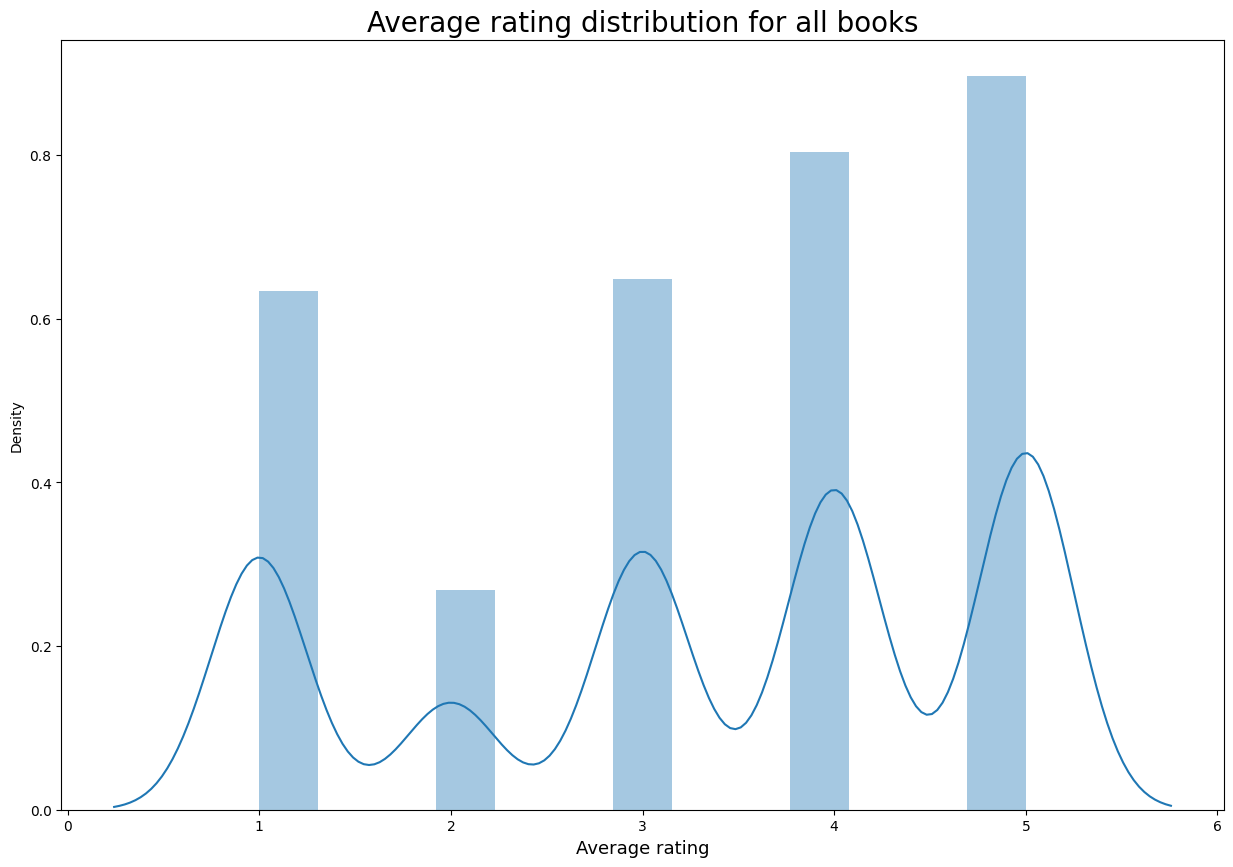

In [ ]:
df.Rating = df.Rating.astype(float)
fig, ax = plt.subplots(figsize=[15,10])
sns.distplot(df['Rating'],ax=ax)
ax.set_title('Average rating distribution for all books',fontsize=20)
ax.set_xlabel('Average rating',fontsize=13)

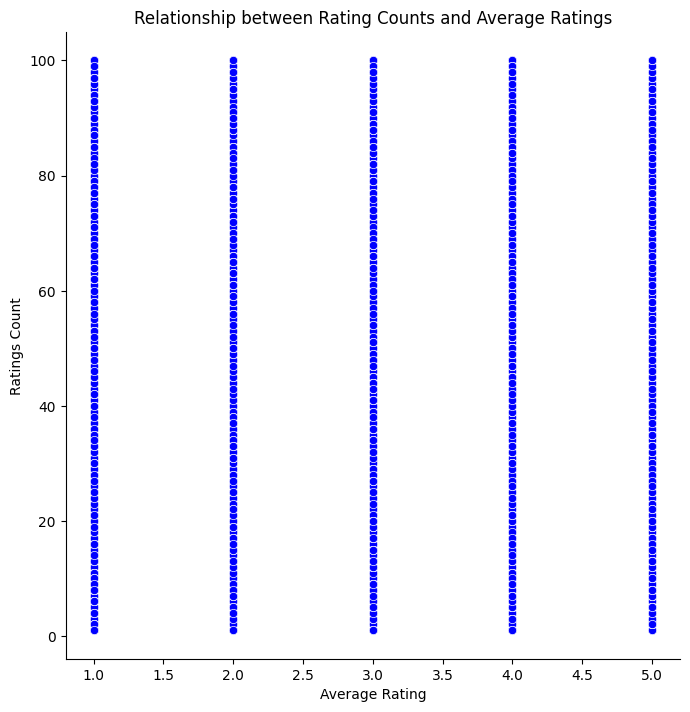

In [ ]:
#Relationship between Average Rating and Reviews Counts
ax = sns.relplot(x="Rating", y="ratings_count", data = df, color = 'blue',sizes=(100, 200), height=7, marker='o')
plt.title("Relationship between Rating Counts and Average Ratings",fontsize = 12)
ax.set_axis_labels("Average Rating", "Ratings Count")

In [ ]:
# from sklearn.preprocessing import LabelEncoder

# # Assuming df is your DataFrame and 'category' is the column you want to convert
# # Replace 'category' with your actual column name

# # Initialize LabelEncoder
# label_encoder = LabelEncoder()

# # Fit and transform the 'category' column
# df['Category'] = label_encoder.fit_transform(df['Category'])

# # Display the DataFrame with the converted 'category' column
# print(df)


In [ ]:
trial = df[['Rating', 'ratings_count']]
data = np.asarray([np.asarray(trial['Rating']), np.asarray(trial['ratings_count'])]).T

data

array([[ 1., 98.],
       [ 1., 27.],
       [ 1., 75.],
       ...,
       [ 5., 93.],
       [ 5., 61.],
       [ 5., 51.]])

Text(0.5, 1.0, 'Elbow Curve')

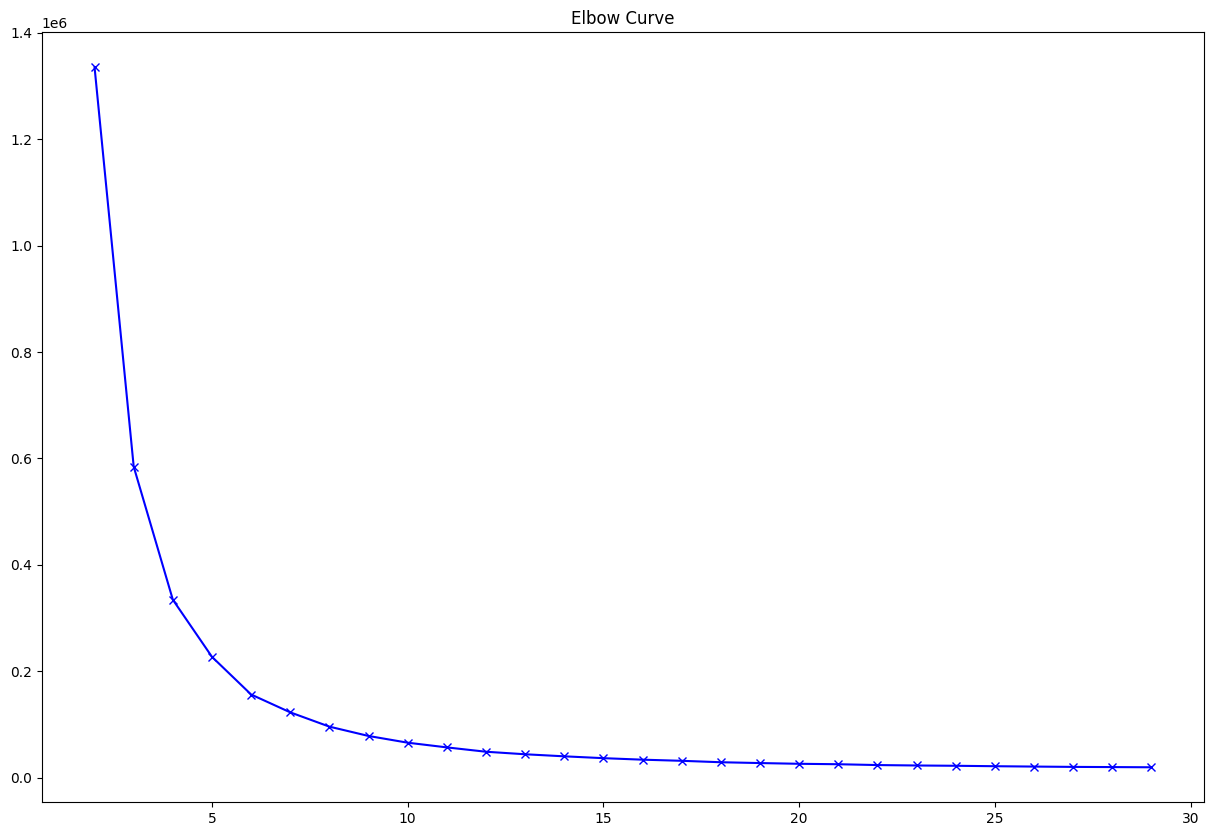

In [ ]:
X = data
distortions = []
for k in range(2,30):
    k_means = KMeans(n_clusters = k)
    k_means.fit(X)
    distortions.append(k_means.inertia_)

fig = plt.figure(figsize=(15,10))
plt.plot(range(2,30), distortions, 'bx-')
plt.title("Elbow Curve")

In [ ]:
#Computing K means with K = 5, thus, taking it as 5 clusters
centroids, _ = kmeans(data, 5)

#assigning each sample to a cluster
#Vector Quantisation:

idx, _ = vq(data, centroids)

idx

array([1, 4, 2, ..., 1, 3, 3], dtype=int32)

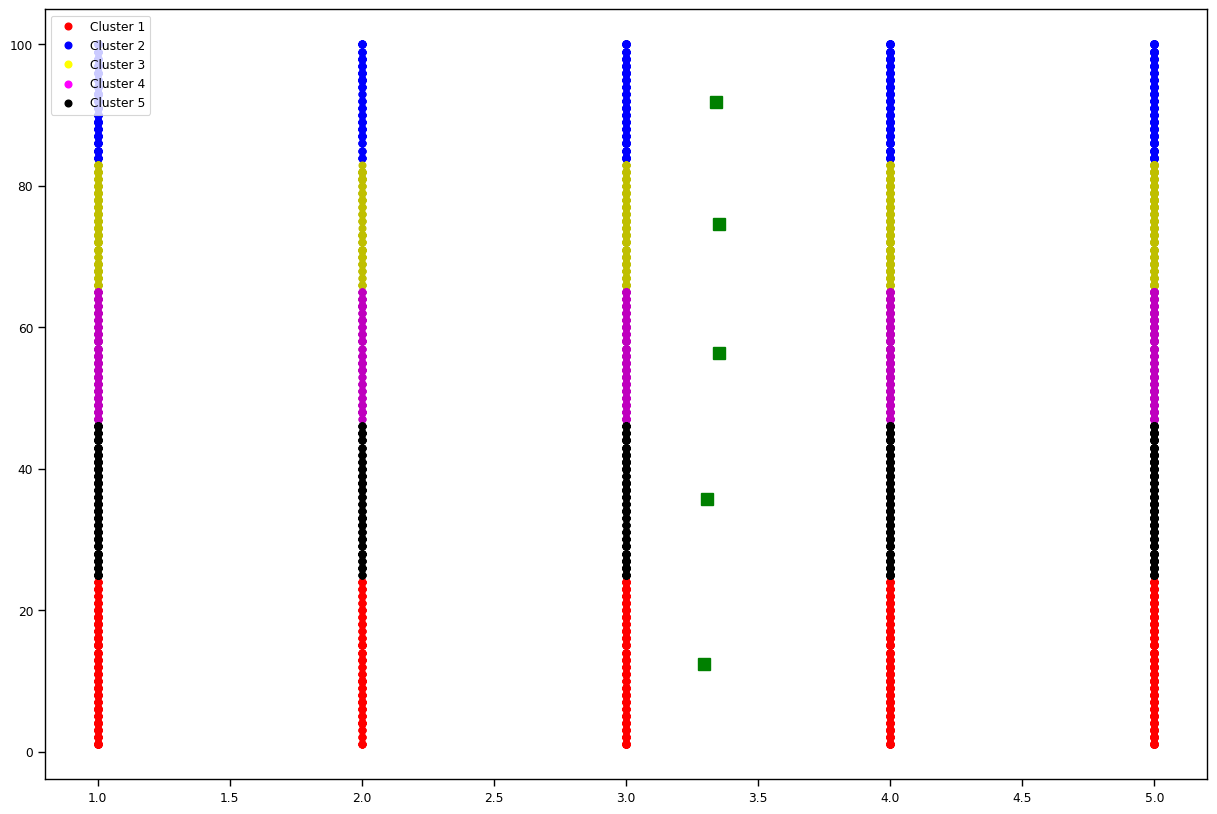

In [ ]:
# some plotting using numpy's logical indexing
sns.set_context('paper')
plt.figure(figsize=(15,10))
plt.plot(data[idx==0,0],data[idx==0,1],'or',#red circles
     data[idx==1,0],data[idx==1,1],'ob',#blue circles
     data[idx==2,0],data[idx==2,1],'oy', #yellow circles
     data[idx==3,0],data[idx==3,1],'om', #magenta circles
     data[idx==4,0],data[idx==4,1],'ok',#black circles
)
plt.plot(centroids[:,0],centroids[:,1],'sg',markersize=8, )


circle1 = Line2D(range(1), range(1), color = 'red', linewidth = 0, marker= 'o', markerfacecolor='red')
circle2 = Line2D(range(1), range(1), color = 'blue', linewidth = 0,marker= 'o', markerfacecolor='blue')
circle3 = Line2D(range(1), range(1), color = 'yellow',linewidth=0,  marker= 'o', markerfacecolor='yellow')
circle4 = Line2D(range(1), range(1), color = 'magenta', linewidth=0,marker= 'o', markerfacecolor='magenta')
circle5 = Line2D(range(1), range(1), color = 'black', linewidth = 0,marker= 'o', markerfacecolor='black')

plt.legend((circle1, circle2, circle3, circle4, circle5)
           , ('Cluster 1','Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'), numpoints = 1, loc = 0, )
plt.show()


In [ ]:
def segregation(data):
    values = []
    for val in data.Rating:
        if val>=0 and val<=1:
            values.append("Between 0 and 1")
        elif val>1 and val<=2:
            values.append("Between 1 and 2")
        elif val>2 and val<=3:
            values.append("Between 2 and 3")
        elif val>3 and val<=4:
            values.append("Between 3 and 4")
        elif val>4 and val<=5:
            values.append("Between 4 and 5")
        else:
            values.append("NaN")
    print(len(values))
    return values


In [ ]:
df['Ratings_Dist'] = segregation(df)

6292


In [ ]:
df

id                                          Book_Name  \
0      96523                                  ‡¶Æ‡ßÅ‡¶®‡¶§‡¶æ‡¶ñ‡¶æ‡¶¨ ‡¶π‡¶æ‡¶¶‡ßÄ‡¶∏      
1      39118                  ‡¶Æ‡ßá‡¶ò‡¶æ‡¶ö‡ßç‡¶õ‡¶®‡ßç‡¶® ‡¶à‡¶Æ‡¶æ‡¶® (‡¶™‡ßá‡¶™‡¶æ‡¶∞‡¶¨‡ßç‡¶Ø‡¶æ‡¶ï)        
2     141682   ‡¶∏‡¶æ‡¶Æ‡¶∑‡ßç‡¶ü‡¶ø‡¶ï ‡¶Ö‡¶∞‡ßç‡¶•‡¶®‡ßÄ‡¶§‡¶ø (‡¶™‡¶æ‡¶∞‡ßç‡¶∏ ‡¶ï‡ßã‡¶∞‡ßç‡¶∏ ‡¶¶‡ßç‡¶¨‡¶ø‡¶§‡ßÄ‡ßü ‡¶¨‡¶∞‡ßç‡¶∑‡ßá‡¶∞...   
3     136770   ‡¶õ‡¶æ‡¶§‡ßç‡¶∞‡¶≤‡ßÄ‡¶ó‡ßá‡¶∞ ‡¶á‡¶§‡¶ø‡¶π‡¶æ‡¶∏ ‡¶¨‡¶æ‡¶Ç‡¶≤‡¶æ‡¶¶‡ßá‡¶∂‡ßá‡¶∞ ‡¶á‡¶§‡¶ø‡¶π‡¶æ‡¶∏ (‡ßß‡ßØ‡ß™‡ßÆ-‡ßß‡ßØ‡ß≠...   
4      82740   ‡¶è‡¶∏‡¶è‡¶∏‡¶∏‡¶ø ‡¶¨‡¶ø‡¶ú‡ßç‡¶û‡¶æ‡¶® ‡¶Æ‡ßá‡¶á‡¶° ‡¶á‡¶ú‡¶ø ‡¶™‡ßç‡¶∞‡¶∂‡ßç‡¶®‡¶™‡¶§‡ßç‡¶∞, ‡¶∏‡¶ï‡¶≤ ‡¶∂‡¶ø‡¶ï‡ßç‡¶∑...   
...      ...                                                ...   
6287   21943   ‡¶§‡¶ø‡¶Æ‡¶ø‡¶∞ ‡¶™‡ßç‡¶∞‡ßá‡¶Æ, ‡¶∏‡¶™‡ßç‡¶§ ‡¶Ü‡¶§‡¶ô‡ßç‡¶ï, ‡¶≤‡¶∞‡ßç‡¶®‡¶æ ‡¶°‡ßÅ‡¶® (‡¶™‡ßá‡¶™‡¶æ‡¶∞‡¶¨‡ßç‡¶Ø‡¶æ...   
6288   51194       Guinness World Records 2020 (Hardcover)        
6289   35327                               ‡¶ñ‡ßÅ‡¶® (‡¶π‡¶æ‡¶∞‡ßç‡¶°‡¶ï‡¶≠‡¶æ‡¶∞)        
6290    8262      ‡¶è‡¶ï‡¶æ‡¶§‡ßç‡¶§‡¶∞ ‡¶è‡¶¨‡¶Ç ‡¶Æ‡ßÅ‡¶ï‡ßç‡¶§‡¶ø‡¶Ø‡ßã‡¶¶‡ßç‡¶ß‡¶æ ‡¶™‡¶∞‡¶ø‡¶¨‡¶æ‡¶∞ (‡¶π‡¶æ‡¶∞‡ßç‡¶°‡¶ï‡¶≠‡¶æ‡¶∞)     
6291   58654                     ‡¶∞‡¶π‡¶∏‡ßç‡¶Ø‡ßá‡¶∞ ‡¶¶‡ßç‡¶¨‡ßÄ‡¶™ (‡¶π‡¶æ‡¶∞‡ßç‡¶°‡¶ï‡¶≠‡¶æ‡¶∞)        

                              Writer_Name  \
0            ‡¶Æ‡¶æ‡¶ì‡¶≤‡¶æ‡¶®‡¶æ ‡¶Æ‡ßã‡¶É ‡¶∏‡¶æ‡¶ñ‡¶æ‡¶ì‡ßü‡¶æ‡¶§ ‡¶â‡¶≤‡ßç‡¶≤‡¶æ‡¶π    
1             ‡¶∂‡¶æ‡¶á‡¶ñ ‡¶Ü‡¶¨‡ßç‡¶¶‡ßÅ‡¶≤ ‡¶Æ‡¶æ‡¶≤‡¶ø‡¶ï ‡¶Ü‡¶≤ ‡¶ï‡¶æ‡¶∏‡¶ø‡¶Æ    
2                  ‡¶∏‡ßÅ‡¶ï‡ßá‡¶∂ ‡¶ö‡¶®‡ßç‡¶¶‡ßç‡¶∞ ‡¶ú‡ßã‡ßü‡¶æ‡¶∞‡¶¶‡¶æ‡¶∞    
3                     ‡¶∏‡¶æ‡¶á‡¶´‡ßÅ‡¶∞ ‡¶∞‡¶π‡¶Æ‡¶æ‡¶® ‡¶∏‡ßã‡¶π‡¶æ‡¶ó    
4      ‡¶™‡¶æ‡¶û‡ßç‡¶ú‡ßá‡¶∞‡ßÄ ‡¶∏‡¶Æ‡ßç‡¶™‡¶æ‡¶¶‡¶®‡¶æ ‡¶™‡¶∞‡ßç‡¶∑‡¶¶ (‡¶∏‡¶Æ‡ßç‡¶™‡¶æ‡¶¶‡¶ï)    
...                                   ...   
6287                  ‡¶Ü‡¶∞. ‡¶°‡¶ø. ‡¶¨‡ßç‡¶≤‡ßç‡¶Ø‡¶æ‡¶ï‡¶Æ‡ßã‡¶∞    
6288     Guinness World Records (Editor)    
6289                         ‡¶Ü‡¶π‡¶Æ‡ßá‡¶¶ ‡¶´‡¶æ‡¶∞‡ßÅ‡¶ï    
6290                         ‡¶Ü‡¶ì‡¶≤‡¶ø‡ßü‡¶æ ‡¶ñ‡¶æ‡¶®‡¶Æ    
6291                           ‡¶ú‡ßÅ‡¶≤ ‡¶≠‡¶æ‡¶∞‡ßç‡¶®    

                                               Category  Rating  \
0                                      ‡¶π‡¶æ‡¶¶‡¶ø‡¶∏ ‡¶ì ‡¶∏‡ßÅ‡¶®‡ßç‡¶®‡¶æ‡¶§      1.0   
1                               ‡¶à‡¶Æ‡¶æ‡¶®, ‡¶Ü‡¶ï‡ßç‡¶¨‡¶ø‡¶¶‡¶æ ‡¶ì ‡¶§‡¶æ‡¶ì‡¶¨‡¶æ‡¶π      1.0   
2                                               ‡¶°‡¶ø‡¶ó‡ßç‡¶∞‡¶ø      1.0   
3                          ‡¶™‡ßç‡¶∞‡¶∏‡¶ô‡ßç‡¶ó: ‡¶¨‡¶æ‡¶Ç‡¶≤‡¶æ‡¶¶‡ßá‡¶∂‡ßá‡¶∞ ‡¶∞‡¶æ‡¶ú‡¶®‡ßÄ‡¶§‡¶ø      1.0   
4      ‡¶®‡¶¨‡¶Æ ‡¶ì ‡¶¶‡¶∂‡¶Æ (‡¶è‡¶∏‡¶è‡¶∏‡¶∏‡¶ø): ‡¶¨‡¶ø‡¶ú‡ßç‡¶û‡¶æ‡¶® ‡¶¨‡¶ø‡¶≠‡¶æ‡¶ó ‡¶™‡¶æ‡¶†‡ßç‡¶Ø ‡¶∏‡¶π‡¶æ‡¶Ø‡¶º...     1.0   
...                                                 ...     ...   
6287   ‡¶∞‡¶π‡¶∏‡ßç‡¶Ø, ‡¶ó‡ßã‡ßü‡ßá‡¶®‡ßç‡¶¶‡¶æ, ‡¶≠‡ßå‡¶§‡¶ø‡¶ï, ‡¶Æ‡¶ø‡¶•, ‡¶•‡ßç‡¶∞‡¶ø‡¶≤‡¶æ‡¶∞, ‡¶ì ‡¶Ö‡ßç‡¶Ø‡¶æ‡¶°...     5.0   
6288   Foreign Language Books: Essay, Articles & Res...     5.0   
6289                                   ‡¶∏‡¶Æ‡¶ï‡¶æ‡¶≤‡ßÄ‡¶® ‡¶â‡¶™‡¶®‡ßç‡¶Ø‡¶æ‡¶∏      5.0   
6290           ‡¶Æ‡ßÅ‡¶ï‡ßç‡¶§‡¶ø‡¶Ø‡ßÅ‡¶¶‡ßç‡¶ß‡ßá‡¶∞ ‡¶°‡¶æ‡ßü‡ßá‡¶∞‡¶ø, ‡¶ö‡¶ø‡¶†‡¶ø ‡¶ì ‡¶∏‡ßç‡¶Æ‡ßÉ‡¶§‡¶ø‡¶ö‡¶æ‡¶∞‡¶£      5.0   
6291                                ‡¶∂‡¶ø‡¶∂‡ßÅ-‡¶ï‡¶ø‡¶∂‡ßã‡¶∞ ‡¶â‡¶™‡¶®‡ßç‡¶Ø‡¶æ‡¶∏      5.0   

                                                 Review      Site sentiment  \
0     (‡ßß) ‡¶¨‡¶á ‡¶ü‡¶ø ‡¶∂‡¶§ ‡¶∂‡¶§  ‡¶ú‡¶æ‡¶≤ ‡¶π‡¶æ‡¶¶‡¶ø‡¶∏‡ßá ‡¶≠‡¶∞‡¶™‡ßÅ‡¶∞ ‡•§ (‡ß®) ‡¶¶‡ßç‡¶¨‡ßÄ‡¶® ...  Rokomari  negative   
1     ‡¶¨‡¶á ‡¶∞‡¶ø‡¶≠‡¶ø‡¶â : ‡¶Æ‡ßá‡¶ò‡¶æ‡¶ö‡ßç‡¶õ‡¶®‡ßç‡¶® ‡¶à‡¶Æ‡¶æ‡¶®  ‡¶™‡¶æ‡¶† ‡¶Ö‡¶®‡ßÅ‡¶≠‡ßÇ‡¶§‡¶ø: "‡¶è‡¶ï‡¶ü‡¶ø...  Rokomari  negative   
2                                             ‡¶™‡¶°‡¶º‡¶§‡ßá ‡¶ö‡¶æ‡¶á  Rokomari  negative   
3                                               ‡¶†‡¶ø‡¶ï ‡¶Ü‡¶õ‡ßá  Rokomari  negative   
4     ‡¶è‡¶ü‡¶ø ‡¶è‡¶∏‡¶è‡¶∏‡¶∏‡¶ø ‡¶∂‡¶ø‡¶ï‡ßç‡¶∑‡¶æ‡¶∞‡ßç‡¶•‡ßÄ‡¶∞ 2020 ‡¶è‡¶∞ ‡¶ú‡¶®‡ßç‡¶Ø ‡¶è‡

In [ ]:
books_features = pd.concat([df['Ratings_Dist'].str.get_dummies(sep=","), df['Rating'], df['ratings_count']], axis=1)
books_features.head()

Between 0 and 1  Between 1 and 2  Between 2 and 3  Between 3 and 4  \
0                1                0                0                0   
1                1                0                0                0   
2                1                0                0                0   
3                1                0                0                0   
4                1                0                0                0   

   Between 4 and 5  Rating  ratings_count  
0                0     1.0           98.0  
1                0     1.0           27.0  
2                0     1.0           75.0  
3                0     1.0           51.0  
4                0     1.0           77.0

In [ ]:
books_features.shape

(6292, 7)

In [ ]:
min_max_scaler = MinMaxScaler()
books_features = min_max_scaler.fit_transform(books_features)

In [ ]:
np.round(books_features, 2)

array([[1.  , 0.  , 0.  , ..., 0.  , 0.  , 0.98],
       [1.  , 0.  , 0.  , ..., 0.  , 0.  , 0.26],
       [1.  , 0.  , 0.  , ..., 0.  , 0.  , 0.75],
       ...,
       [0.  , 0.  , 0.  , ..., 1.  , 1.  , 0.93],
       [0.  , 0.  , 0.  , ..., 1.  , 1.  , 0.61],
       [0.  , 0.  , 0.  , ..., 1.  , 1.  , 0.51]])

In [ ]:
model = neighbors.NearestNeighbors(n_neighbors=6, algorithm='ball_tree')
model.fit(books_features)
distance, indices = model.kneighbors(books_features)

In [ ]:
def get_index_from_name(name):
    return df[df["Book_name_without_spaces"]==name].index.tolist()[0]

all_books_names = list(df.Book_name_without_spaces.values)

def get_id_from_partial_name(partial):
    for name in all_books_names:
        if partial in name:
            print(name,all_books_names.index(name))

In [ ]:
def print_similar_books(query=None,id=None):
    if id:
        for id in indices[id][1:]:
            print(df.iloc[id]["Book_Name"])
    if query:
        found_id = get_index_from_name(query)
        for id in indices[found_id][1:]:
            print(df.iloc[id]["Book_Name"])

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd
import numpy as np

# Assuming df is your DataFrame
features_for_clustering = df[['Rating', 'ratings_count']].values

# Specify the number of clusters (you can adjust this based on your analysis)
n_clusters = 5

# Train k-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_assignments = kmeans.fit_predict(features_for_clustering)

# Calculate silhouette score
silhouette_avg = silhouette_score(features_for_clustering, cluster_assignments)
print(f"Silhouette Score: {silhouette_avg}")

# Calculate within-cluster sum of squares (WCSS)
wcss = kmeans.inertia_
print("Within-Cluster")
print(f"Sum of Squares (WCSS): {wcss}")

Silhouette Score: 0.5327335607525849
Within-Cluster
Sum of Squares (WCSS): 227579.44734093337


In [ ]:
name = input("Enter any text: ")
name = name.replace(" ", "")
print(print_similar_books(name))

Enter any text: ‡¶Æ‡ßÅ‡¶®‡¶§‡¶æ‡¶ñ‡¶æ‡¶¨ ‡¶π‡¶æ‡¶¶‡ßÄ‡¶∏
 ‡¶π‡ßÅ ‡¶â‡¶á‡¶≤ ‡¶ï‡ßç‡¶∞‡¶æ‡¶á ‡¶π‡ßü‡ßá‡¶® ‡¶á‡¶â ‡¶°‡¶æ‡¶á! (‡¶π‡¶æ‡¶∞‡ßç‡¶°‡¶ï‡¶≠‡¶æ‡¶∞)  ‡¶¨‡ßç‡¶Ø‡¶ï‡ßç‡¶§‡¶ø‡¶§‡ßç‡¶¨, ‡¶Ü‡¶§‡ßç‡¶Æ‡¶™‡ßç‡¶∞‡¶§‡ßç‡¶Ø‡ßü, ‡¶Ü‡¶§‡ßç‡¶Æ‡¶â‡¶®‡ßç‡¶®‡ßü‡¶®, ‡¶∏‡ßÅ‡¶ñ ‡¶ì ‡¶∏‡¶æ‡¶´‡¶≤‡ßç‡¶Ø‡¶Æ‡ßü ‡¶ú‡ßÄ‡¶¨‡¶® ‡¶ó‡¶†‡¶®‡ßá‡¶∞ ‡ßß‡ß¶‡ßß ‡¶∏‡ßÇ‡¶§‡ßç‡¶∞   
 ‡¶∞‡ßã‡¶≤ ‡¶®‡¶æ‡¶Æ‡ßç‡¶¨‡¶æ‡¶∞ ‡¶∂‡ßÇ‡¶®‡ßç‡¶Ø (‡¶π‡¶æ‡¶∞‡ßç‡¶°‡¶ï‡¶≠‡¶æ‡¶∞)     
 ‡¶Æ‡ßÅ‡¶®‡¶§‡¶æ‡¶ñ‡¶æ‡¶¨ ‡¶π‡¶æ‡¶¶‡ßÄ‡¶∏   
 ‡¶∏‡¶π‡ßÄ‡¶π‡ßç‚Äå ‡¶¨‡¶ô‡ßç‡¶ó‡¶æ‡¶®‡ßÅ‡¶¨‡¶æ‡¶¶ ‡¶¨‡ßã‡¶ñ‡¶æ‡¶∞‡ßÄ ‡¶∂‡¶∞‡ßÄ‡¶´ (‡ßß ‡¶•‡ßá‡¶ï‡ßá ‡ßß‡ß¶ ‡¶ñ‡¶£‡ßç‡¶° ‡¶è‡¶ï‡¶§‡ßç‡¶∞‡ßá) (‡¶π‡¶æ‡¶∞‡ßç‡¶°‡¶ï‡¶≠‡¶æ‡¶∞)  
 ‡¶¶‡ßá‡¶¨‡¶§‡¶æ‡¶∞ ‡¶Æ‡¶æ‡¶®‡¶¨‡¶æ‡ßü‡¶®      
None


In [1]:
# Python3 code for the above approach

# Hexadecimal to binary conversion


def hex2bin(s):
	mp = {'0': "0000",
		'1': "0001",
		'2': "0010",
		'3': "0011",
		'4': "0100",
		'5': "0101",
		'6': "0110",
		'7': "0111",
		'8': "1000",
		'9': "1001",
		'A': "1010",
		'B': "1011",
		'C': "1100",
		'D': "1101",
		'E': "1110",
		'F': "1111"}
	bin = ""
	for i in range(len(s)):
		bin = bin + mp[s[i]]
	return bin

# Binary to hexadecimal conversion


def bin2hex(s):
	mp = {"0000": '0',
		"0001": '1',
		"0010": '2',
		"0011": '3',
		"0100": '4',
		"0101": '5',
		"0110": '6',
		"0111": '7',
		"1000": '8',
		"1001": '9',
		"1010": 'A',
		"1011": 'B',
		"1100": 'C',
		"1101": 'D',
		"1110": 'E',
		"1111": 'F'}
	hex = ""
	for i in range(0, len(s), 4):
		ch = ""
		ch = ch + s[i]
		ch = ch + s[i + 1]
		ch = ch + s[i + 2]
		ch = ch + s[i + 3]
		hex = hex + mp[ch]

	return hex

# Binary to decimal conversion


def bin2dec(binary):

	binary1 = binary
	decimal, i, n = 0, 0, 0
	while(binary != 0):
		dec = binary % 10
		decimal = decimal + dec * pow(2, i)
		binary = binary//10
		i += 1
	return decimal

# Decimal to binary conversion


def dec2bin(num):
	res = bin(num).replace("0b", "")
	if(len(res) % 4 != 0):
		div = len(res) / 4
		div = int(div)
		counter = (4 * (div + 1)) - len(res)
		for i in range(0, counter):
			res = '0' + res
	return res

# Permute function to rearrange the bits


def permute(k, arr, n):
	permutation = ""
	for i in range(0, n):
		permutation = permutation + k[arr[i] - 1]
	return permutation

# shifting the bits towards left by nth shifts


def shift_left(k, nth_shifts):
	s = ""
	for i in range(nth_shifts):
		for j in range(1, len(k)):
			s = s + k[j]
		s = s + k[0]
		k = s
		s = ""
	return k

# calculating xow of two strings of binary number a and b


def xor(a, b):
	ans = ""
	for i in range(len(a)):
		if a[i] == b[i]:
			ans = ans + "0"
		else:
			ans = ans + "1"
	return ans


# Table of Position of 64 bits at initial level: Initial Permutation Table
initial_perm = [58, 50, 42, 34, 26, 18, 10, 2,
				60, 52, 44, 36, 28, 20, 12, 4,
				62, 54, 46, 38, 30, 22, 14, 6,
				64, 56, 48, 40, 32, 24, 16, 8,
				57, 49, 41, 33, 25, 17, 9, 1,
				59, 51, 43, 35, 27, 19, 11, 3,
				61, 53, 45, 37, 29, 21, 13, 5,
				63, 55, 47, 39, 31, 23, 15, 7]

# Expansion D-box Table
exp_d = [32, 1, 2, 3, 4, 5, 4, 5,
		6, 7, 8, 9, 8, 9, 10, 11,
		12, 13, 12, 13, 14, 15, 16, 17,
		16, 17, 18, 19, 20, 21, 20, 21,
		22, 23, 24, 25, 24, 25, 26, 27,
		28, 29, 28, 29, 30, 31, 32, 1]

# Straight Permutation Table
per = [16, 7, 20, 21,
	29, 12, 28, 17,
	1, 15, 23, 26,
	5, 18, 31, 10,
	2, 8, 24, 14,
	32, 27, 3, 9,
	19, 13, 30, 6,
	22, 11, 4, 25]

# S-box Table
sbox = [[[14, 4, 13, 1, 2, 15, 11, 8, 3, 10, 6, 12, 5, 9, 0, 7],
		[0, 15, 7, 4, 14, 2, 13, 1, 10, 6, 12, 11, 9, 5, 3, 8],
		[4, 1, 14, 8, 13, 6, 2, 11, 15, 12, 9, 7, 3, 10, 5, 0],
		[15, 12, 8, 2, 4, 9, 1, 7, 5, 11, 3, 14, 10, 0, 6, 13]],

		[[15, 1, 8, 14, 6, 11, 3, 4, 9, 7, 2, 13, 12, 0, 5, 10],
		[3, 13, 4, 7, 15, 2, 8, 14, 12, 0, 1, 10, 6, 9, 11, 5],
		[0, 14, 7, 11, 10, 4, 13, 1, 5, 8, 12, 6, 9, 3, 2, 15],
		[13, 8, 10, 1, 3, 15, 4, 2, 11, 6, 7, 12, 0, 5, 14, 9]],

		[[10, 0, 9, 14, 6, 3, 15, 5, 1, 13, 12, 7, 11, 4, 2, 8],
		[13, 7, 0, 9, 3, 4, 6, 10, 2, 8, 5, 14, 12, 11, 15, 1],
		[13, 6, 4, 9, 8, 15, 3, 0, 11, 1, 2, 12, 5, 10, 14, 7],
		[1, 10, 13, 0, 6, 9, 8, 7, 4, 15, 14, 3, 11, 5, 2, 12]],

		[[7, 13, 14, 3, 0, 6, 9, 10, 1, 2, 8, 5, 11, 12, 4, 15],
		[13, 8, 11, 5, 6, 15, 0, 3, 4, 7, 2, 12, 1, 10, 14, 9],
		[10, 6, 9, 0, 12, 11, 7, 13, 15, 1, 3, 14, 5, 2, 8, 4],
		[3, 15, 0, 6, 10, 1, 13, 8, 9, 4, 5, 11, 12, 7, 2, 14]],

		[[2, 12, 4, 1, 7, 10, 11, 6, 8, 5, 3, 15, 13, 0, 14, 9],
		[14, 11, 2, 12, 4, 7, 13, 1, 5, 0, 15, 10, 3, 9, 8, 6],
		[4, 2, 1, 11, 10, 13, 7, 8, 15, 9, 12, 5, 6, 3, 0, 14],
		[11, 8, 12, 7, 1, 14, 2, 13, 6, 15, 0, 9, 10, 4, 5, 3]],

		[[12, 1, 10, 15, 9, 2, 6, 8, 0, 13, 3, 4, 14, 7, 5, 11],
		[10, 15, 4, 2, 7, 12, 9, 5, 6, 1, 13, 14, 0, 11, 3, 8],
		[9, 14, 15, 5, 2, 8, 12, 3, 7, 0, 4, 10, 1, 13, 11, 6],
		[4, 3, 2, 12, 9, 5, 15, 10, 11, 14, 1, 7, 6, 0, 8, 13]],

		[[4, 11, 2, 14, 15, 0, 8, 13, 3, 12, 9, 7, 5, 10, 6, 1],
		[13, 0, 11, 7, 4, 9, 1, 10, 14, 3, 5, 12, 2, 15, 8, 6],
		[1, 4, 11, 13, 12, 3, 7, 14, 10, 15, 6, 8, 0, 5, 9, 2],
		[6, 11, 13, 8, 1, 4, 10, 7, 9, 5, 0, 15, 14, 2, 3, 12]],

		[[13, 2, 8, 4, 6, 15, 11, 1, 10, 9, 3, 14, 5, 0, 12, 7],
		[1, 15, 13, 8, 10, 3, 7, 4, 12, 5, 6, 11, 0, 14, 9, 2],
		[7, 11, 4, 1, 9, 12, 14, 2, 0, 6, 10, 13, 15, 3, 5, 8],
		[2, 1, 14, 7, 4, 10, 8, 13, 15, 12, 9, 0, 3, 5, 6, 11]]]

# Final Permutation Table
final_perm = [40, 8, 48, 16, 56, 24, 64, 32,
			39, 7, 47, 15, 55, 23, 63, 31,
			38, 6, 46, 14, 54, 22, 62, 30,
			37, 5, 45, 13, 53, 21, 61, 29,
			36, 4, 44, 12, 52, 20, 60, 28,
			35, 3, 43, 11, 51, 19, 59, 27,
			34, 2, 42, 10, 50, 18, 58, 26,
			33, 1, 41, 9, 49, 17, 57, 25]


def encrypt(pt, rkb, rk):
	pt = hex2bin(pt)

	# Initial Permutation
	pt = permute(pt, initial_perm, 64)
	print("After initial permutation", bin2hex(pt))

	# Splitting
	left = pt[0:32]
	right = pt[32:64]
	for i in range(0, 16):
		# Expansion D-box: Expanding the 32 bits data into 48 bits
		right_expanded = permute(right, exp_d, 48)

		# XOR RoundKey[i] and right_expanded
		xor_x = xor(right_expanded, rkb[i])

		# S-boxex: substituting the value from s-box table by calculating row and column
		sbox_str = ""
		for j in range(0, 8):
			row = bin2dec(int(xor_x[j * 6] + xor_x[j * 6 + 5]))
			col = bin2dec(
				int(xor_x[j * 6 + 1] + xor_x[j * 6 + 2] + xor_x[j * 6 + 3] + xor_x[j * 6 + 4]))
			val = sbox[j][row][col]
			sbox_str = sbox_str + dec2bin(val)

		# Straight D-box: After substituting rearranging the bits
		sbox_str = permute(sbox_str, per, 32)

		# XOR left and sbox_str
		result = xor(left, sbox_str)
		left = result

		# Swapper
		if(i != 15):
			left, right = right, left
		print("Round ", i + 1, " ", bin2hex(left),
			" ", bin2hex(right), " ", rk[i])

	# Combination
	combine = left + right

	# Final permutation: final rearranging of bits to get cipher text
	cipher_text = permute(combine, final_perm, 64)
	return cipher_text


pt = "123456ABCD132536"
key = "AABB09182736CCDD"

# Key generation
# --hex to binary
key = hex2bin(key)

# --parity bit drop table
keyp = [57, 49, 41, 33, 25, 17, 9,
		1, 58, 50, 42, 34, 26, 18,
		10, 2, 59, 51, 43, 35, 27,
		19, 11, 3, 60, 52, 44, 36,
		63, 55, 47, 39, 31, 23, 15,
		7, 62, 54, 46, 38, 30, 22,
		14, 6, 61, 53, 45, 37, 29,
		21, 13, 5, 28, 20, 12, 4]

# getting 56 bit key from 64 bit using the parity bits
key = permute(key, keyp, 56)

# Number of bit shifts
shift_table = [1, 1, 2, 2,
			2, 2, 2, 2,
			1, 2, 2, 2,
			2, 2, 2, 1]

# Key- Compression Table : Compression of key from 56 bits to 48 bits
key_comp = [14, 17, 11, 24, 1, 5,
			3, 28, 15, 6, 21, 10,
			23, 19, 12, 4, 26, 8,
			16, 7, 27, 20, 13, 2,
			41, 52, 31, 37, 47, 55,
			30, 40, 51, 45, 33, 48,
			44, 49, 39, 56, 34, 53,
			46, 42, 50, 36, 29, 32]

# Splitting
left = key[0:28] # rkb for RoundKeys in binary
right = key[28:56] # rk for RoundKeys in hexadecimal

rkb = []
rk = []
for i in range(0, 16):
	# Shifting the bits by nth shifts by checking from shift table
	left = shift_left(left, shift_table[i])
	right = shift_left(right, shift_table[i])

	# Combination of left and right string
	combine_str = left + right

	# Compression of key from 56 to 48 bits
	round_key = permute(combine_str, key_comp, 48)

	rkb.append(round_key)
	rk.append(bin2hex(round_key))

print("Encryption")
cipher_text = bin2hex(encrypt(pt, rkb, rk))
print("Cipher Text : ", cipher_text)

print("Decryption")
rkb_rev = rkb[::-1]
rk_rev = rk[::-1]
text = bin2hex(encrypt(cipher_text, rkb_rev, rk_rev))
print("Plain Text : ", text)

# This code is contributed by Aditya Jain


Encryption
After initial permutation 14A7D67818CA18AD
Round  1   18CA18AD   5A78E394   194CD072DE8C
Round  2   5A78E394   4A1210F6   4568581ABCCE
Round  3   4A1210F6   B8089591   06EDA4ACF5B5
Round  4   B8089591   236779C2   DA2D032B6EE3
Round  5   236779C2   A15A4B87   69A629FEC913
Round  6   A15A4B87   2E8F9C65   C1948E87475E
Round  7   2E8F9C65   A9FC20A3   708AD2DDB3C0
Round  8   A9FC20A3   308BEE97   34F822F0C66D
Round  9   308BEE97   10AF9D37   84BB4473DCCC
Round  10   10AF9D37   6CA6CB20   02765708B5BF
Round  11   6CA6CB20   FF3C485F   6D5560AF7CA5
Round  12   FF3C485F   22A5963B   C2C1E96A4BF3
Round  13   22A5963B   387CCDAA   99C31397C91F
Round  14   387CCDAA   BD2DD2AB   251B8BC717D0
Round  15   BD2DD2AB   CF26B472   3330C5D9A36D
Round  16   19BA9212   CF26B472   181C5D75C66D
Cipher Text :  C0B7A8D05F3A829C
Decryption
After initial permutation 19BA9212CF26B472
Round  1   CF26B472   BD2DD2AB   181C5D75C66D
Round  2   BD2DD2AB   387CCDAA   3330C5D9A36D
Round  3   387CCDAA   22A